# How to read a CSV file to a Dataframe

Syntax: pd.read_csv(filepath_or_buffer, sep=’, ‘, delimiter=None, header=’infer’, names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression=’infer’, thousands=None, decimal=b’.’, lineterminator=None, quotechar='”‘, quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)

# # Loading a Dataset from the UCI Machine Learning Repository

In [ ]:
import pandas as pd

In [30]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 146374 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.24-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.24-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.24-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [35]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [ ]:
import numpy as np

In [ ]:
data = pd.read_csv('drive/data/online_shoppers_intention.csv')

In [ ]:
data.head(n=20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [ ]:
data.shape

(12330, 18)

Create feature and target datasets 

In [29]:
feats = data.drop('Revenue', axis=1)# The axis=1 argument tells the function to drop columns rather than rows.
target = data['Revenue']
print(f'Features table has {feats.shape[0]} rows and {feats.shape[1]} columns')
print(f'Target table has {target.shape[0]} rows')

NameError: ignored

In [ ]:
# save the DataFrames as CSV files so that we can use them later
feats.to_csv('drive/data/OSI_feats.csv', index=False)
target.to_csv('drive/data/OSI_target.csv', header='Revenue', index=False)

# Data Preprocessing

## Cleaning the Data

In [ ]:
%matplotlib inline
import pandas as pd
data = pd.read_csv('drive/data/OSI_feats.csv')# load the feature data set

In [ ]:
data.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False


In [ ]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Convert the binary column, Weekend, into a numerical column

In [ ]:
data['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

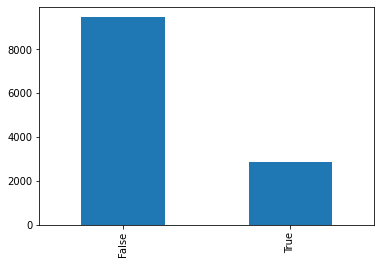

In [ ]:
# Plotting bargraph
data['Weekend'].value_counts().plot(kind='bar') 
# Here, we can see that this distribution is skewed toward false values. This column represents whether the visit to the website occurred on a weekend

In [ ]:
# Convert the column into a numerical value by converting the True values into 1 and the False values into 0
data['is_weekend'] = data['Weekend'].apply(lambda \
                     row: 1 if row == True else 0)

The apply function iterates through each element in the column and
applies the function provided as the argument. A function has to be supplied
as the argument. Here, a lambda function is supplied

In [ ]:
data[['Weekend','is_weekend']].tail()

,Weekend,is_weekend
12325,True,1
12326,True,1
12327,True,1
12328,False,0
12329,True,1


In [ ]:
# Now we can drop the Weekend column, as only the is_weekend column is needed:
data.drop('Weekend', axis=1, inplace=True)

## Let's demonstrate how to manipulate categorical columns 

In [ ]:
data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

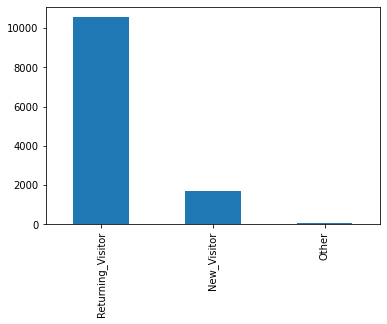

In [ ]:
data['VisitorType'].value_counts().plot(kind='bar')

In [ ]:
# Call the get_dummies function on the VisitorType column and take a look at the rows alongside the original
colname = 'VisitorType'
visitor_type_dummies = pd.get_dummies(data[colname], \
                                      prefix=colname)
pd.concat([data[colname], \
           visitor_type_dummies], axis=1).tail(n=10)

,VisitorType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
12320,Returning_Visitor,0,0,1
12321,Returning_Visitor,0,0,1
12322,Returning_Visitor,0,0,1
12323,Returning_Visitor,0,0,1
12324,Returning_Visitor,0,0,1
12325,Returning_Visitor,0,0,1
12326,Returning_Visitor,0,0,1
12327,Returning_Visitor,0,0,1
12328,Returning_Visitor,0,0,1
12329,New_Visitor,1,0,0


In [ ]:
# To remove the interdependency, drop the VisitorType_Other column because it occurs with the lowest frequency
visitor_type_dummies.drop('VisitorType_Other', \
                          axis=1, inplace=True)
visitor_type_dummies.head()

,VisitorType_New_Visitor,VisitorType_Returning_Visitor
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
# Finally, add these dummy columns to the original feature data by concatenating the two DataFrames column-wise and dropping the original column
data = pd.concat([data, visitor_type_dummies], axis=1)
data.drop('VisitorType', axis=1, inplace=True)
data.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,is_weekend,VisitorType_New_Visitor,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,1,0,1


lets manupulate the month column

In [ ]:
data['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [ ]:
colname = 'Month'
Month_dummies = pd.get_dummies(data[colname])
pd.concat([data[colname], \
           Month_dummies], axis=1).tail(n=10)

,Month,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
12320,Nov,0,0,0,0,0,0,0,1,0,0
12321,Nov,0,0,0,0,0,0,0,1,0,0
12322,Dec,0,1,0,0,0,0,0,0,0,0
12323,Nov,0,0,0,0,0,0,0,1,0,0
12324,Nov,0,0,0,0,0,0,0,1,0,0
12325,Dec,0,1,0,0,0,0,0,0,0,0
12326,Nov,0,0,0,0,0,0,0,1,0,0
12327,Nov,0,0,0,0,0,0,0,1,0,0
12328,Nov,0,0,0,0,0,0,0,1,0,0
12329,Nov,0,0,0,0,0,0,0,1,0,0


In [ ]:
data = pd.concat([data, Month_dummies], axis=1)
data.drop('Month', axis=1, inplace=True)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,is_weekend,VisitorType_New_Visitor,VisitorType_Returning_Visitor,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,1,0,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,1,0,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,1,0,1,0,0,1,0,0,0,0,0,0,0


In [ ]:
data.dtypes

Administrative                     int64
Administrative_Duration          float64
Informational                      int64
Informational_Duration           float64
ProductRelated                     int64
ProductRelated_Duration          float64
BounceRates                      float64
ExitRates                        float64
PageValues                       float64
SpecialDay                       float64
OperatingSystems                   int64
Browser                            int64
Region                             int64
TrafficType                        int64
is_weekend                         int64
VisitorType_New_Visitor            uint8
VisitorType_Returning_Visitor      uint8
Aug                                uint8
Dec                                uint8
Feb                                uint8
Jul                                uint8
June                               uint8
Mar                                uint8
May                                uint8
Nov             

Now that we have verified the datatypes, we have a dataset we can use to train a model, so let's save this for later

In [ ]:
data.to_csv('drive/data/OSI_feats_e2.csv', index=False)

## Lets convert the target to numerical

In [ ]:
target = pd.read_csv('drive/data/OSI_target.csv')
target.head(n=10)

,Revenue
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [ ]:
target['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [ ]:
target['Revenue'] = target['Revenue'].apply(lambda \
                     row: 1 if row == True else 0)

In [ ]:
# Finally, save the target dataset to a CSV file
target.to_csv('drive/data/OSI_target_e2.csv', index=False)

# Appropriate Representation of the Data

In our online shoppers purchase intention dataset, we have some columns that
are defined as numerical variables when, upon closer inspection, they are actually
categorical variables that have been given numerical labels. These columns are
OperatingSystems, Browser, TrafficType, and Region. Currently, we have
treated them as numerical variables, though they are categorical, which should be
encoded into the features if we want the models we build to learn the relationships
between the features and the target.
We do this because we may be encoding some misleading relationships in the
features. For example, if the value of the OperatingSystems field is equal to 2,
does that mean it is twice the value as that which has the value 1? Probably not,
since it refers to the operating system. For this reason, we will convert the field into a
categorical variable. The same may be applied to the Browser, TrafficType, and
Region columns

In [ ]:
data = pd.read_csv('drive/data/OSI_feats_e2.csv')

In [ ]:
data['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [ ]:
# Create dummy variables from the OperatingSystem column
colname = 'OperatingSystems'
operation_system_dummies = pd.get_dummies(data[colname], \
                                          prefix=colname)

In [ ]:
operation_system_dummies.drop(colname+'_5', axis=1, \
                              inplace=True)
data = pd.concat([data, operation_system_dummies], axis=1)

In [ ]:
# Create dummy variables from the Browser column
data['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [ ]:
colname = 'Browser'
browser_dummies = pd.get_dummies(data[colname], \
                                 prefix=colname)
browser_dummies.drop(colname+'_9', axis=1, inplace=True)
data = pd.concat([data, browser_dummies], axis=1)

In [ ]:
# Create dummy variables from the Browser column
data['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [ ]:
colname = 'TrafficType'
browser_dummies = pd.get_dummies(data[colname], \
                                 prefix=colname)
browser_dummies.drop(colname+'_17', axis=1, inplace=True)
data = pd.concat([data, browser_dummies], axis=1)

In [ ]:
# Create dummy variables from the Region column
data['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

In [ ]:
colname = 'Region'
browser_dummies = pd.get_dummies(data[colname], \
                                 prefix=colname)
browser_dummies.drop(colname+'_5', axis=1, inplace=True)
data = pd.concat([data, browser_dummies], axis=1)

In [ ]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,is_weekend,VisitorType_New_Visitor,VisitorType_Returning_Visitor,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_10,Browser_11,Browser_12,Browser_13,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20,Region_1,Region_2,Region_3,Region_4,Region_6,Region_7,Region_8,Region_9
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
data.drop('Region', axis=1, inplace=True)
data.drop('TrafficType', axis=1, inplace=True)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,is_weekend,VisitorType_New_Visitor,VisitorType_Returning_Visitor,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_10,Browser_11,Browser_12,Browser_13,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20,Region_1,Region_2,Region_3,Region_4,Region_6,Region_7,Region_8,Region_9
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
data.drop('OperatingSystems', axis=1, inplace=True)
data.drop('Browser', axis=1, inplace=True)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,is_weekend,VisitorType_New_Visitor,VisitorType_Returning_Visitor,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_10,Browser_11,Browser_12,Browser_13,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20,Region_1,Region_2,Region_3,Region_4,Region_6,Region_7,Region_8,Region_9
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
                            ...   
Region_4                     uint8
Region_6                     uint8
Region_7                     uint8
Region_8                     uint8
Region_9                     uint8
Length: 69, dtype: object

Finally, save the dataset to a CSV file for later use

In [ ]:
data.to_csv('drive/data/OSI_feats_e3.csv', index=False)

# create a simple logistic regression model from the
scikit-learn package

In [ ]:
feats = pd.read_csv('drive/data/OSI_feats_e3.csv')
target = pd.read_csv('drive/data/OSI_target_e2.csv')

Begin by creating a test and training dataset. Train the data using the
training dataset and evaluate the performance of the model on the
test dataset.
We will use test_size = 0.2, which means that 20% of the data
will be reserved for testing, and we will set a number for the random_
state parameter:

In [ ]:
from sklearn.model_selection import train_test_split
test_size = 0.2
random_state = 42
X_train, X_test, \
y_train, y_test = train_test_split(feats, target, \
                                   test_size=test_size, \
                                   random_state=random_state)

In [ ]:
# Print out the shape of each DataFrame to verify that the dimensions are correct
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (9864, 69)
Shape of y_train: (9864, 1)
Shape of X_test: (2466, 69)
Shape of y_test: (2466, 1)


In [ ]:
# Next, instantiate the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42, max_iter=5000, verbose=0)

In [ ]:
#Then, fit the model to the training data:
model.fit(X_train, y_train['Revenue'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# To test the performance of the model, compare the predictions of the modelwith the true values
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_pred=y_pred, \
                                  y_true=y_test)
print(f'Accuracy of the model is {accuracy*100:.4f}%')

Accuracy of the model is 87.1046%


In [ ]:
precision, recall, fscore, _ = \
metrics.precision_recall_fscore_support(y_pred=y_pred, \
                                        y_true=y_test, \
                                        average='binary')
print(f'Precision: {precision:.4f}\nRecall: \
{recall:.4f}\nfscore: {fscore:.4f}')

Precision: 0.7337
Recall: 0.3552
fscore: 0.4787


Since these metrics are scored between 0 and 1, the recall and fscore
are not as impressive as the accuracy, though looking at all of these metrics
together can help us find where our models are doing well and where they
could be improved by examining in which observations the model gets
predictions incorrect.

Look at the coefficients that the model outputs to observe which features have a
greater impact on the overall result of the prediction

In [ ]:
coef_list = [f'{feature}: {coef}' for coef, \
             feature in sorted(zip(model.coef_[0], \
             X_train.columns.values.tolist()))]
for item in coef_list:
  print(item)

VisitorType_Returning_Visitor: -0.7588869554570307
Dec: -0.6136371491894962
OperatingSystems_3: -0.5388173459288464
May: -0.5171338473184639
TrafficType_3: -0.503366450428494
Mar: -0.4757664934057189
TrafficType_13: -0.45112363334281336
Region_9: -0.3288245427231076
Browser_1: -0.3156786600182182
VisitorType_New_Visitor: -0.29507548131732303
SpecialDay: -0.2648417264228303
Browser_2: -0.2595021411396107
ExitRates: -0.2539246696823486
TrafficType_1: -0.2480808122818173
Region_4: -0.23382293816152513
OperatingSystems_1: -0.2220759273272896
June: -0.1981580254694997
Browser_4: -0.18679174294087794
Region_3: -0.1824061585924333
BounceRates: -0.1820976011814928
OperatingSystems_2: -0.17529836632319673
Feb: -0.17153448150172068
Region_7: -0.16361839832024205
OperatingSystems_8: -0.15798456134439304
Browser_6: -0.13938854710172752
TrafficType_6: -0.13568923381393014
OperatingSystems_4: -0.13347576229891686
Browser_13: -0.11234196508897454
Browser_3: -0.1076581599660815
Region_1: -0.0887281215

# Determining a Baseline Model

In this exercise, we will put the model performance into context. The accuracy we
attained from our model seemed good, but we need something to compare it to.
Since machine learning model performance is relative, it is important to develop a
robust baseline with which to compare models. Once again, we are using the online
shoppers purchasing intention dataset, and our target variable is whether or not
each user will purchase a product in their session. Follow these steps to complete
this exercise:

In [ ]:
# calculate the relative proportion of each value of the target variables
target['Revenue'].value_counts()/target.shape[0]*100

0    84.525547
1    15.474453
Name: Revenue, dtype: float64

Here, we can see that 0 is represented 84.525547% of the time—that is, there
is no purchase by the user, and this is our baseline accuracy. Now, for the
other model evaluation metrics:

In [ ]:
from sklearn import metrics
y_baseline = pd.Series(data=[0]*target.shape[0])
precision, recall, \
fscore, _ = metrics.precision_recall_fscore_support\
            (y_pred=y_baseline, \
             y_true=target['Revenue'], average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Here, we've set the baseline model to predict 0 and have repeated the value so
that it's the same as the number of rows in the test dataset.

In [ ]:
print(f'Precision: {precision:.4f}\nRecall:\
{recall:.4f}\nfscore: {fscore:.4f}')

Precision: 0.4226
Recall:0.5000
fscore: 0.4581


Now, we have a baseline model that we can compare to our previous model, as
well as any subsequent models. By doing this, we can tell that while the accuracy
of our previous model seemed high, it did not score much better than this
baseline model.

# Regularization

Earlier in this chapter, we learned about overfitting and what it looks like.
The hallmark of overfitting is when a model is trained on the training data
and performs extremely well yet performs terribly on test data. One reason for
this could be that the model may be relying too heavily on certain features that
lead to good performance in the training dataset but do not generalize well to new
observations of data or the test dataset.
One technique that can be used to avoid this is called regularization.
Regularization constrains the values of the coefficients toward zero, which discourages a complex model. There are many different types of regularization techniques. For example, in linear and logistic regression, ridge and lasso regularization are most common. In tree-based models, limiting the maximum depth of the trees acts as regularization.

There are two different types of regularization, namely L1 and L2. This term is either the L2 norm (the sum of the squared values) of the weights or the L1 norm (the sum of the absolute values) of the weights. Since the l1 regularization parameter acts as a feature selector, it is able to reduce the coefficient of features to zero. We can use
the output of this model to observe which features do not contribute much to the performance and remove them entirely if desired. The l2 regularization parameter will not reduce the coefficient of features to zero, so we will observe that they all have non-zero values

Dropout is another form of regularization that's used to prevent overfitting in ANNs.
Dropout randomly selects nodes at each iteration and removes them, along with their
connections, as shown in the following figure:

# Cross-Validation

One popular example of cross-validation is called k-fold cross-validation. This technique gives us the ability to test our model on unseen data while retaining a test set that we will use to test at the end. Using this method, the data is divided into k subsets. In each of the k iterations, k-1 of the subsets are used as training data and
the remaining subset is used as a validation set. This is repeated k times until all k subsets have been used as validation sets.

By using this technique, there is a significant reduction in bias, since most of the data
is used for fitting. There is also a reduction in variation since most of the data is also
used for validation. Typically, there are between 5 and 10 folds, and the technique
can even be stratified, which is useful when there is a large imbalance of classes.

# Creating a Logistic Regression Model Using Keras

In [ ]:
# Instantiate a model of the Sequential class from the keras.models library
from keras.models import Sequential
from tensorflow import random

np.random.seed(42)        
random.set_seed(42)
model = Sequential()

In [ ]:
# Add a single layer of the Dense class from the keras.layers package to the model instance. 
from keras.layers import Dense
model.add(Dense(1, input_dim=X_train.shape[1]))

In [ ]:
# Add a sigmoid activation function to the model
from keras.layers import Activation
model.add(Activation('sigmoid'))

In [ ]:
# Compile the model instance by specifying the optimizer to use, the loss metric toevaluate, 
# and any other metrics to evaluate after each epoch
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 70        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Fit the model to the training data, specifying the number of epochs to run for and the validation split to use
history = model.fit(X_train, y_train['Revenue'], epochs=10, validation_split=0.2, shuffle=False)

Epoch 1/10
247/247 [==============================] - 1s 3ms/step - loss: 44.3953 - accuracy: 0.3768 - val_loss: 2.3887 - val_accuracy: 0.7674
Epoch 2/10
247/247 [==============================] - 0s 1ms/step - loss: 1.8994 - accuracy: 0.7925 - val_loss: 1.0641 - val_accuracy: 0.8388
Epoch 3/10
247/247 [==============================] - 0s 1ms/step - loss: 1.0759 - accuracy: 0.8357 - val_loss: 0.7740 - val_accuracy: 0.8545
Epoch 4/10
247/247 [==============================] - 0s 1ms/step - loss: 0.8071 - accuracy: 0.8540 - val_loss: 0.5537 - val_accuracy: 0.8667
Epoch 5/10
247/247 [==============================] - 0s 1ms/step - loss: 0.6080 - accuracy: 0.8667 - val_loss: 0.4016 - val_accuracy: 0.8819
Epoch 6/10
247/247 [==============================] - 0s 1ms/step - loss: 0.4563 - accuracy: 0.8762 - val_loss: 0.3597 - val_accuracy: 0.8849
Epoch 7/10
247/247 [==============================] - 0s 1ms/step - loss: 0.3611 - accuracy: 0.8813 - val_loss: 0.3740 - val_accuracy: 0.8779
Epoch

In [ ]:
# Plot the loss and other evaluation metrics with respect to the epoch that will be evaluated on the training and validation datasets
import matplotlib.pyplot as plt
%matplotlib inline

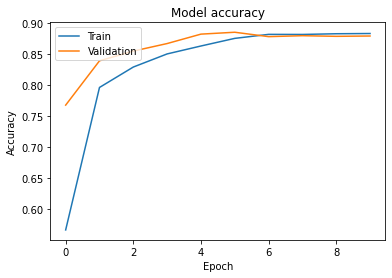

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

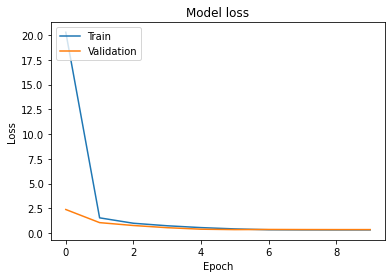

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

We can see that the accuracy increases with every epoch, and the loss decreases with every epoch, and begins to converges.

We can also see that the validation set performs slightly better than the training set which is unexpected but not unwelcome.

In [ ]:
# Evaluate the loss and other evaluation metrics on the test dataset
test_loss, test_acc = model.evaluate(X_test, y_test['Revenue'])
print(f'The loss on the test set is {test_loss:.4f} and the accuracy is {test_acc*100:.3f}%')


78/78 [==============================] - 0s 893us/step - loss: 0.4222 - accuracy: 0.8642
The loss on the test set is 0.4222 and the accuracy is 86.415%


# Neural Network Implementation with Keras

In [ ]:
X = pd.read_csv('drive/data/tree_class_feats.csv')
y = pd.read_csv('drive/data/tree_class_target.csv')

In [ ]:
# Print the sizes of the dataset
print("Number of Examples in the Dataset = ", X.shape[0])
print("Number of Features for each example = ", X.shape[1]) 
print("Possible Output Classes = ", np.unique(y))

Number of Examples in the Dataset =  10000
Number of Features for each example =  10
Possible Output Classes =  [0 1]


In [ ]:
# Define your model as a Keras sequential model 
from keras.models import Sequential
from tensorflow import random
random.set_seed(42)
np.random.seed(42)
model = Sequential()

In [ ]:
# Add one hidden layer of size 10 with activation function of type tanh to your model
from keras.layers import Dense, Activation
model.add(Dense(10, activation='tanh', input_dim=X.shape[1]))

In [ ]:
# Add another hidden layer, this time of size 5, with activation function of type tanh 
model.add(Dense(5, activation='tanh'))

In [ ]:
# Add the output layer with sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Choose the loss function to be binary cross entropy and the optimizer to be SGD for training the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train your model for 100 epochs and batch size equal to 5
history = model.fit(X, y, epochs=100, batch_size=5, verbose=1, validation_split=0.2, shuffle=False)

Epoch 1/100
1600/1600 [==============================] - 3s 1ms/step - loss: 0.4357 - accuracy: 0.7930 - val_loss: 0.3277 - val_accuracy: 0.8540
Epoch 2/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.3352 - accuracy: 0.8453 - val_loss: 0.3018 - val_accuracy: 0.8690
Epoch 3/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.3077 - accuracy: 0.8644 - val_loss: 0.2760 - val_accuracy: 0.8820
Epoch 4/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2795 - accuracy: 0.8864 - val_loss: 0.2523 - val_accuracy: 0.8915
Epoch 5/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2562 - accuracy: 0.8985 - val_loss: 0.2327 - val_accuracy: 0.9000
Epoch 6/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2392 - accuracy: 0.9037 - val_loss: 0.2190 - val_accuracy: 0.9010
Epoch 7/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2278 - accuracy: 0.9093 - val_loss: 0.2093 - val_ac

Train your model for 100 epochs and set a batch_size equal to 5 and a
validation_split equal to 0.2, and then set shuffle equal to false
using the fit() method. Remember that you need to pass the input data, X,
and its corresponding outputs, y, to the fit() method to train the model. Also,
keep in mind that training a network may take a long time, depending on the size
of the dataset, the size of the network, the number of epochs, and the number of
CPUs or GPUs available. Save the results to a variable named history

The verbose argument can take any of these three values: 0, 1, or 2.
By choosing verbose=0, no information will be printed during training.
verbose=1 will print a full progress bar at every iteration, while verbose=2
will print only the epoch number:

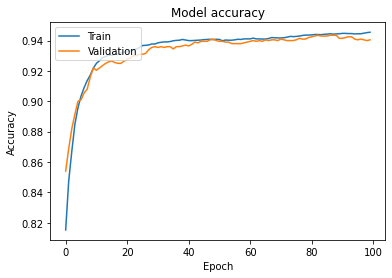

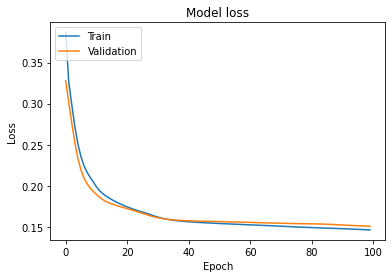

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Use your trained model to predict the output class for the first 10 input data examples
y_predicted = model.predict(X.iloc[0:10,:]) 

# print the predicted classes
print("Predicted probability for each of the examples belonging to class 1: "),
print(y_predicted)
print("Predicted class label for each of the examples: "), 
print(np.round(y_predicted))

Predicted probability for each of the examples belonging to class 1: 
[[8.1184506e-04]
 [5.4513520e-01]
 [3.4909248e-03]
 [9.3182838e-01]
 [9.7332621e-01]
 [1.2651384e-03]
 [7.6924908e-01]
 [1.2798905e-03]
 [1.7900765e-03]
 [9.9841940e-01]]
Predicted class label for each of the examples: 
[[0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]]


# Building a Single-Layer Neural Network for Performing Binary Classification

In [ ]:
# import required packages from Keras
from keras.models import Sequential 
from keras.layers import Dense, Activation 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import random

In [ ]:
from google.colab import files
files.upload()

Saving utils.py to utils.py


{'utils.py': b'import numpy as np \nimport matplotlib.pyplot as plt \nimport matplotlib.patches as mpatches\n\ndef plot_decision_boundary(pred_func, X, Y): \n    # create a mesh of possible values for X1 and X2\n    x1_min, x1_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5 \n    x2_min, x2_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5 \n    h = 0.01 \n    X1, X2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))\n    # predict output for all the values in the mesh\n    Y_hat = pred_func(np.c_[X1.ravel(), X2.ravel()]) \n    Y_hat = Y_hat.reshape(X1.shape) \n    Y_hat = Y_hat.round(decimals=0)\n    # plot predicted values\n    plt.contourf(X1, X2, Y_hat, cmap=plt.cm.Spectral) \n    # plot points in the training dataset\n    class_1=plt.scatter(X.loc[Y[\'Class\']==0,\'feature1\'], X.loc[Y[\'Class\']==0,\'feature2\'], c="red", s=40, edgecolor=\'k\')\n    class_2=plt.scatter(X.loc[Y[\'Class\']==1,\'feature1\'], X.loc[Y[\'Class\']==1,\'feature2\'], c="

In [ ]:
# import required packages for plotting
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline 
import matplotlib.patches as mpatches
# import the function for plotting decision boundary
from utils import plot_decision_boundary



In [ ]:
# define a seed for random number generator so the result will be reproducible
seed = 1
np.random.seed(seed)
random.set_seed(seed)

In [ ]:
# load the dataset, print the shapes of input and output and the number of examples
feats = pd.read_csv('drive/data/outlier_feats.csv')
target = pd.read_csv('drive/data/outlier_target.csv')
print("X size = ", feats.shape)
print("Y size = ", target.shape)
print("Number of examples = ", feats.shape[0])

X size =  (3359, 2)
Y size =  (3359, 1)
Number of examples =  3359


Text(0, 0.5, 'Feature 2')

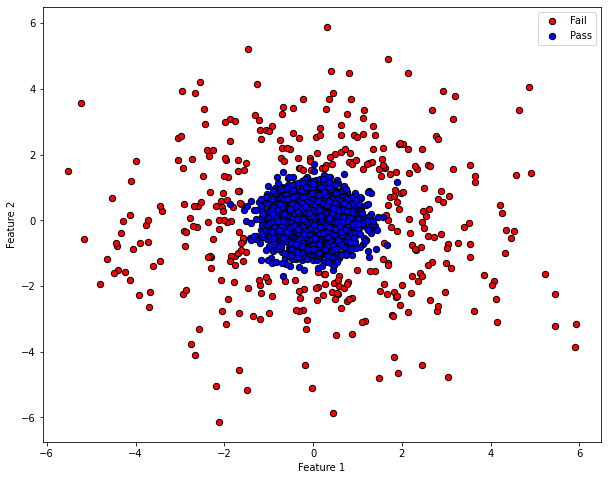

In [ ]:
# changing the size of the plots
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

class_1=plt.scatter(feats.loc[target['Class']==0,'feature1'], feats.loc[target['Class']==0,'feature2'], c="red", s=40, edgecolor='k')
class_2=plt.scatter(feats.loc[target['Class']==1,'feature1'], feats.loc[target['Class']==1,'feature2'], c="blue", s=40, edgecolor='k')
plt.legend((class_1, class_2),('Fail','Pass'))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [ ]:
# Logistic Regression model
np.random.seed(seed)
random.set_seed(seed)
model_1 = Sequential()
model_1.add(Dense(1, activation='sigmoid', input_dim=2)) 
model_1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy']) 

[0.8364399671554565, 0.4938969910144806]

In [ ]:
# train the model for 100 epoches and batch size 5
model_1.fit(feats, target, batch_size=5, epochs=100, verbose=1, validation_split=0.2, shuffle=False)

Epoch 1/100
538/538 [==============================] - 1s 2ms/step - loss: 0.3367 - val_loss: 0.3546
Epoch 2/100
538/538 [==============================] - 1s 2ms/step - loss: 0.3367 - val_loss: 0.3544
Epoch 3/100
538/538 [==============================] - 1s 2ms/step - loss: 0.3367 - val_loss: 0.3543
Epoch 4/100
538/538 [==============================] - 1s 2ms/step - loss: 0.3367 - val_loss: 0.3542
Epoch 5/100
538/538 [==============================] - 1s 2ms/step - loss: 0.3367 - val_loss: 0.3542
Epoch 6/100
538/538 [==============================] - 1s 2ms/step - loss: 0.3367 - val_loss: 0.3541
Epoch 7/100
538/538 [==============================] - 1s 2ms/step - loss: 0.3367 - val_loss: 0.3541
Epoch 8/100
538/538 [==============================] - 1s 2ms/step - loss: 0.3367 - val_loss: 0.3541
Epoch 9/100
538/538 [==============================] - 1s 2ms/step - loss: 0.3367 - val_loss: 0.3541
Epoch 10/100
538/538 [==============================] - 1s 2ms/step - loss: 0.3367 - val_lo

Text(0.5, 1.0, 'Logistic Regression')

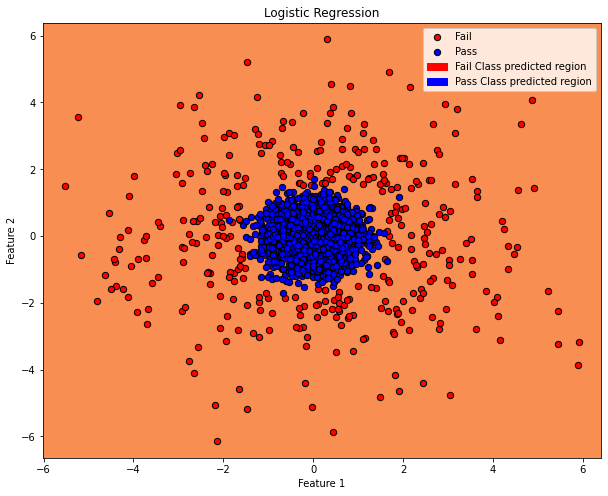

In [ ]:
# Plot the decision boundray
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plot_decision_boundary(lambda x: model_1.predict(x), feats, target) 
plt.title("Logistic Regression")

In [ ]:
model_1.evaluate(feats, target, batch_size=None, verbose=0)

[0.8364399671554565, 0.4938969910144806]

## # Neural network with hidden layer size = 3

In [ ]:
np.random.seed(seed)
random.set_seed(seed)
model_2 = Sequential() 
model_2.add(Dense(3, activation='relu', input_dim=2))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy']) 


In [ ]:
# train the model for 200 epoches and batch size 5
model_2.fit(feats, target, batch_size=5, epochs=200, verbose=1, validation_split=0.2, shuffle=False)

Epoch 1/200
538/538 [==============================] - 2s 3ms/step - loss: 0.5593 - accuracy: 0.8379 - val_loss: 0.3794 - val_accuracy: 0.8884
Epoch 2/200
538/538 [==============================] - 1s 2ms/step - loss: 0.3450 - accuracy: 0.9021 - val_loss: 0.3127 - val_accuracy: 0.8914
Epoch 3/200
538/538 [==============================] - 1s 2ms/step - loss: 0.2874 - accuracy: 0.9059 - val_loss: 0.2693 - val_accuracy: 0.8988
Epoch 4/200
538/538 [==============================] - 1s 3ms/step - loss: 0.2473 - accuracy: 0.9147 - val_loss: 0.2310 - val_accuracy: 0.9256
Epoch 5/200
538/538 [==============================] - 1s 2ms/step - loss: 0.2116 - accuracy: 0.9304 - val_loss: 0.1975 - val_accuracy: 0.9315
Epoch 6/200
538/538 [==============================] - 1s 2ms/step - loss: 0.1813 - accuracy: 0.9420 - val_loss: 0.1701 - val_accuracy: 0.9449
Epoch 7/200
538/538 [==============================] - 1s 2ms/step - loss: 0.1572 - accuracy: 0.9523 - val_loss: 0.1489 - val_accuracy: 0.9524

Text(0.5, 1.0, 'Decision Boundary for Neural Network with hidden layer size 3')

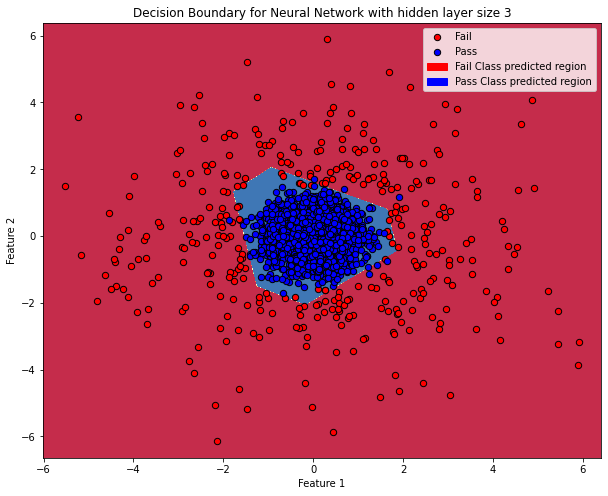

In [ ]:
# Plot decision boundary
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plot_decision_boundary(lambda x: model_2.predict(x), feats, target) 
plt.title("Decision Boundary for Neural Network with hidden layer size 3")

In [ ]:
model_2.evaluate(feats, target, batch_size=None, verbose=0)

## Create a neural network with hidden layer of size 6

In [ ]:
np.random.seed(seed)
random.set_seed(seed)
model_3 = Sequential() 
model_3.add(Dense(6, activation='relu', input_dim=2))
model_3.add(Dense(1, activation='sigmoid'))
model_3.compile(optimizer='sgd', loss='binary_crossentropy') 
# train the model for 400 epoches
model_3.fit(feats, target, batch_size=5, epochs=400, verbose=1, validation_split=0.2, shuffle=False)

Epoch 1/400
538/538 [==============================] - 1s 2ms/step - loss: 0.5149 - val_loss: 0.3259
Epoch 2/400
538/538 [==============================] - 1s 2ms/step - loss: 0.2906 - val_loss: 0.2633
Epoch 3/400
538/538 [==============================] - 1s 2ms/step - loss: 0.2355 - val_loss: 0.2127
Epoch 4/400
538/538 [==============================] - 1s 2ms/step - loss: 0.1926 - val_loss: 0.1749
Epoch 5/400
538/538 [==============================] - 1s 2ms/step - loss: 0.1610 - val_loss: 0.1477
Epoch 6/400
538/538 [==============================] - 1s 2ms/step - loss: 0.1381 - val_loss: 0.1282
Epoch 7/400
538/538 [==============================] - 1s 2ms/step - loss: 0.1212 - val_loss: 0.1137
Epoch 8/400
538/538 [==============================] - 1s 2ms/step - loss: 0.1083 - val_loss: 0.1026
Epoch 9/400
538/538 [==============================] - 1s 2ms/step - loss: 0.0978 - val_loss: 0.0936
Epoch 10/400
538/538 [==============================] - 1s 2ms/step - loss: 0.0892 - val_lo

Text(0.5, 1.0, 'Decision Boundary for Neural Network with hidden layer size 6')

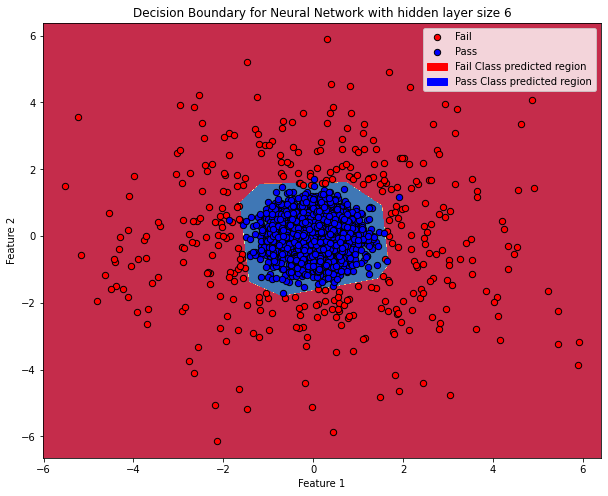

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plot_decision_boundary(lambda x: model_3.predict(x), feats, target) 
plt.title("Decision Boundary for Neural Network with hidden layer size 6")

In [ ]:
model_3.evaluate(feats, target, batch_size=None, verbose=0)

# Building the Keras Wrapper with scikit-learn for a Regression Problem

In [ ]:
# import data
import pandas as pd

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 146374 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.24-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.24-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.24-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [ ]:
colnames = ['CIC0', 'SM1_Dz(Z)', 'GATS1i', \
            'NdsCH', 'NdssC','MLOGP', 'LC50']
data = pd.read_csv('drive/data/qsar_fish_toxicity.csv', \
                   sep=';', names=colnames)
X = data.drop('LC50', axis=1)
y = data['LC50']

In [ ]:
print("Number of Examples in the Dataset = ", X.shape[0])
print("Number of Features for each example = ", X.shape[1])
# print output range
print("Output Range = [%f, %f]" %(min(y), max(y)))

Number of Examples in the Dataset =  908
Number of Features for each example =  6
Output Range = [0.053000, 9.612000]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
# Create the function that returns the keras model
def build_model():
# build the Keras model
  model = Sequential()
  model.add(Dense(8, input_dim=X.shape[1], \
                  activation='relu'))
  model.add(Dense(1))
# Compile the model
  model.compile(loss='mean_squared_error', \
                optimizer='adam')
# return the model
  return model

In [ ]:
# Now, use the Keras wrapper with scikit-learn to create the scikit-learn interface for your model.
from keras.wrappers.scikit_learn import KerasRegressor
import numpy as np
from tensorflow import random
seed = 1
np.random.seed(seed)
random.set_seed(seed)
YourModel = KerasRegressor(build_fn= build_model, \
                           epochs=100, batch_size=20, \
                           verbose=1 , shuffle=False) 

# Evaluating Deep Neural Networks with Cross-Validation

In [ ]:
# define the iterator to perform 5-fold cross-validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [ ]:
# perform cross-validation on X, y
from sklearn.model_selection import cross_val_score
results = cross_val_score(YourModel, X, y, cv=kf)

Epoch 1/100
37/37 [==============================] - 2s 2ms/step - loss: 22.8820
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 20.0926
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 17.2218
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 13.7742
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 9.4748
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 5.3591
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 2.9387
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 2.2414
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 2.0359
Epoch 10/100
37/37 [==============================] - 0s 2ms/step - loss: 1.9056
Epoch 11/100
37/37 [==============================] - 0s 2ms/step - loss: 1.7969
Epoch 12/100
37/37 [==============================] - 0s 2ms/step - loss: 1.7034
Epoch 13/100
37/37 [=============

In [ ]:
# print the result
print(f"Final Cross-Validation Loss = {abs(results.mean()):.4f}")

Final Cross-Validation Loss = 0.9404


# Activity 4.01: Model Evaluation Using Cross-Validation for an dvanced Fibrosis Diagnosis Classifier

In [ ]:
X = pd.read_csv('drive/data/HCV_feats.csv')
y = pd.read_csv('drive/data/HCV_target.csv')

# Print the sizes of the dataset
print("Number of Examples in the Dataset = ", X.shape[0])
print("Number of Features for each example = ", X.shape[1]) 
print("Possible Output Classes = ", y['AdvancedFibrosis'].unique())

Number of Examples in the Dataset =  1385
Number of Features for each example =  28
Possible Output Classes =  [0 1]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
# Create the function that returns the keras model
def build_model():
    model = Sequential()
    model.add(Dense(4, input_dim=X.shape[1], activation='tanh'))
    model.add(Dense(2, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# import required packages
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from tensorflow import random

sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

# define a seed for random number generator so the result will be reproducible
seed =1
np.random.seed(seed)
random.set_seed(seed)

# determine the number of folds for k-fold cross validation, number of epochs and batch size
n_folds = 5
epochs=100
batch_size=20

# build the Scikit-Learn interface for the keras model
classifier = KerasClassifier(build_fn=build_model, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)
# define the cross validation iterator
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)
# perform the k-fold cross validation and store the scores in results
results = cross_val_score(classifier, X, y, cv=kfold)

Epoch 1/100
56/56 [==============================] - 1s 2ms/step - loss: 0.6985 - accuracy: 0.5142
Epoch 2/100
56/56 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5219
Epoch 3/100
56/56 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5198
Epoch 4/100
56/56 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5217
Epoch 5/100
56/56 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5319
Epoch 6/100
56/56 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5353
Epoch 7/100
56/56 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5455
Epoch 8/100
56/56 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5528
Epoch 9/100
56/56 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5464
Epoch 10/100
56/56 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.5517
Epoch 11/

In [ ]:
# print accuracy for each fold
for f in range(n_folds):
    print("Test accuracy at fold ", f+1, " = ", results[f])
print("\n")

# print overal cross validation acuuracy plus the standard deviation of the accuracies
print("Final Cross Validation Test Accuracy:", results.mean())
print("Standard Deviation of Final Test Accuracy:", results.std())

Test accuracy at fold  1  =  0.5018050670623779
Test accuracy at fold  2  =  0.512635350227356
Test accuracy at fold  3  =  0.46570396423339844
Test accuracy at fold  4  =  0.5090252757072449
Test accuracy at fold  5  =  0.48736461997032166


Final Cross Validation Test Accuracy: 0.49530685544013975
Standard Deviation of Final Test Accuracy: 0.017147062795470774


# Exercise 4.03: Writing User-Defined Functions to Implement Deep Learning Models with Cross-Validation

In [ ]:
colnames = ['CIC0', 'SM1_Dz(Z)', 'GATS1i', \
            'NdsCH', 'NdssC','MLOGP', 'LC50']
data = pd.read_csv('drive/data/qsar_fish_toxicity.csv', \
                   sep=';', names=colnames)
X = data.drop('LC50', axis=1)
y = data['LC50']

In [ ]:
# Defne the Keras models
from keras.models import Sequential
from keras.layers import Dense

def build_model_1():
    # build the Keras model_1
    model = Sequential()
    model.add(Dense(4, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(1))
    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    # return the model
    return model

def build_model_2():
    # build the Keras model_2
    model = Sequential()
    model.add(Dense(8, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(1))
    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    # return the model
    return model

def build_model_3():
    # build the Keras model_3
    model = Sequential()
    model.add(Dense(4, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(2, activation='relu'))
    model.add(Dense(1))
    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    # return the model
    return model

In [ ]:
# define a seed for random number generator so the result will be reproducible
from tensorflow import random 
seed = 1
np.random.seed(seed)
random.set_seed(seed)

# perform cross validation on each model
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results_1 = []
models = [build_model_1, build_model_2, build_model_3]
# loop over three models
for m in range(len(models)):
    model = KerasRegressor(build_fn=models[m], epochs=100, batch_size=20, verbose=0, shuffle=False)
    kf = KFold(n_splits=3)
    result = cross_val_score(model, X, y, cv=kf)
    results_1.append(result)

In [ ]:
# print the cross validation scores
print("Cross Validation Loss for Model 1 =", abs(results_1[0].mean()))
print("Cross Validation Loss for Model 2 =", abs(results_1[1].mean()))
print("Cross Validation Loss for Model 3 =", abs(results_1[2].mean()))


Cross Validation Loss for Model 1 = 1.0369542837142944
Cross Validation Loss for Model 2 = 0.9512714544932047
Cross Validation Loss for Model 3 = 2.947144786516825


In [ ]:
# define a seed for random number generator so the result will be reproducible
np.random.seed(seed)
random.set_seed(seed)
results_2 = []
epochs = [100, 150]
batches = [20, 15]

# Loop over pairs of epochs and batch_size
for e in range(len(epochs)):
    for b in range(len(batches)):
        model = KerasRegressor(build_fn= build_model_2, epochs= epochs[e], batch_size= batches[b], verbose=0, shuffle=False)
        kf = KFold(n_splits=3)
        result = cross_val_score(model, X, y, cv=kf)
        results_2.append(result)

In [ ]:
# Print cross validation score for each possible pair of epochs, batch_size
c = 0
for e in range(len(epochs)):
    for b in range(len(batches)):
        print("batch_size =", batches[b],", epochs =", epochs[e], ", Test Loss =", abs(results_2[c].mean()))
        c += 1

batch_size = 20 , epochs = 100 , Test Loss = 0.982687771320343
batch_size = 15 , epochs = 100 , Test Loss = 0.9392397999763489
batch_size = 20 , epochs = 150 , Test Loss = 0.9431026577949524
batch_size = 15 , epochs = 150 , Test Loss = 0.9389868974685669


In [ ]:
# Modify build_model_2 function
def build_model_2(activation='relu', optimizer='adam'):
    # build the Keras model_2
    model = Sequential()
    model.add(Dense(8, input_dim=X.shape[1], activation=activation))
    model.add(Dense(1))
    # Compile the model
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    # return the model
    return model

results_3 = []
activations = ['relu', 'tanh']
optimizers = ['sgd', 'adam', 'rmsprop']

# define a seed for random number generator so the result will be reproducible
np.random.seed(seed)
random.set_seed(seed)
# Loop over pairs of activation and optimizer
for o in range(len(optimizers)):
    for a in range(len(activations)):
        optimizer = optimizers[o]
        activation = activations[a]
        model = KerasRegressor(build_fn= build_model_2, epochs=150, batch_size=15, verbose=0, shuffle=False)
        kf = KFold(n_splits=3)
        result = cross_val_score(model, X, y, cv=kf)
        results_3.append(result)

In [ ]:
# Print cross validation score for each possible pair of optimizer, activation
c = 0
for o in range(len(optimizers)):
    for a in range(len(activations)):
        print("activation = ", activations[a],", optimizer = ", optimizers[o], ", Test Loss = ", abs(results_3[c].mean()))
        c += 1

activation =  relu , optimizer =  sgd , Test Loss =  0.9570272564888
activation =  tanh , optimizer =  sgd , Test Loss =  0.9299497405687968
activation =  relu , optimizer =  adam , Test Loss =  0.9406462709108988
activation =  tanh , optimizer =  adam , Test Loss =  0.9389867981274923
activation =  relu , optimizer =  rmsprop , Test Loss =  0.9554681579271952
activation =  tanh , optimizer =  rmsprop , Test Loss =  0.9651281436284384


# Activity 4.02: Model Selection Using Cross-Validation for the Advanced Fibrosis Diagnosis Classifier

In [ ]:
# import the required packages
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from tensorflow import random

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 146374 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.24-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.24-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.24-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [ ]:
# Load the dataset
X = pd.read_csv('drive/data/HCV_feats.csv')
y = pd.read_csv('drive/data/HCV_target.csv')

sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

In [ ]:
# Create the function that returns the keras model 1
def build_model_1(activation='relu', optimizer='adam'):
    # create model 1
    model = Sequential()
    model.add(Dense(4, input_dim=X.shape[1], activation=activation))
    model.add(Dense(4, activation=activation))
    model.add(Dense(4, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create the function that returns the keras model 2
def build_model_2(activation='relu', optimizer='adam'):
    # create model 2
    model = Sequential()
    model.add(Dense(4, input_dim=X.shape[1], activation=activation))
    model.add(Dense(2, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create the function that returns the keras model 3
def build_model_3(activation='relu', optimizer='adam'):
    # create model 3
    model = Sequential()
    model.add(Dense(8, input_dim=X.shape[1], activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
# define a seed for random number generator so the result will be reproducible
seed = 2
np.random.seed(seed)
random.set_seed(seed)

# determine the number of folds for k-fold cross validation, number of epochs and batch size
n_folds = 5
batch_size=20
epochs=50
# define the list to store cross validation scores
results_1 =[]
# define the possible options for the model
models = [build_model_1, build_model_2, build_model_3]
# loop over models
for m in range(len(models)):
    # build the Scikit-Learn interface for the keras model
    classifier = KerasClassifier(build_fn=models[m], epochs=epochs, batch_size=batch_size, verbose=0, shuffle=False)
    # define the cross validation iterator
    kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)
    # perform the k-fold cross validation and store the scores in result
    result = cross_val_score(classifier, X, y, cv=kfold)
    # add the scores to the results list 
    results_1.append(result)

In [ ]:
# Print cross validation score for each model
for m in range(len(models)):
    print("Model", m+1,"Test Accuracy =", results_1[m].mean())

Model 1 Test Accuracy = 0.49458483457565305
Model 2 Test Accuracy = 0.5119133472442627
Model 3 Test Accuracy = 0.5119133532047272


In [ ]:
# define a seed for random number generator so the result will be reproducible
np.random.seed(seed)
random.set_seed(seed)
# determine the number of folds for k-fold cross validation
n_folds = 5
# define possible options for epochs and batch_size
epochs = [100, 200]
batches = [10, 20]
# define the list to store cross validation scores
results_2 =[]
# loop over all possible pairs of epochs, batch_size
for e in range(len(epochs)):
    for b in range(len(batches)):
        # build the Scikit-Learn interface for the keras model
        classifier = KerasClassifier(build_fn=build_model_2, epochs=epochs[e], batch_size=batches[b], verbose=0, shuffle=False)
        # define the cross validation iterator
        kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)
        # perform the k-fold cross validation. 
        # store the scores in result
        result = cross_val_score(classifier, X, y, cv=kfold)
        # add the scores to the results list 
        results_2.append(result)

In [ ]:
# Print cross validation score for each possible pair of epochs, batch_size
c = 0
for e in range(len(epochs)):
    for b in range(len(batches)):
        print("batch_size =", batches[b],", epochs =", epochs[e], ", Test Accuracy =", results_2[c].mean())
        c += 1

batch_size = 10 , epochs = 100 , Test Accuracy = 0.514801436662674
batch_size = 20 , epochs = 100 , Test Accuracy = 0.505415165424347
batch_size = 10 , epochs = 200 , Test Accuracy = 0.5140794157981873
batch_size = 20 , epochs = 200 , Test Accuracy = 0.5046931385993958


In [ ]:
# define a seed for random number generator so the result will be reproducible
np.random.seed(seed)
random.set_seed(seed)
# determine the number of folds for k-fold cross validation, number of epochs and batch size
n_folds = 5
batch_size=20
epochs=200
# define the list to store cross validation scores
results_3 =[]
# define possible options for optimizer and activation
optimizers = ['rmsprop', 'adam','sgd']
activations = ['relu', 'tanh']
# loop over all possible pairs of optimizer, activation
for o in range(len(optimizers)):
    for a in range(len(activations)):
        optimizer = optimizers[o]
        activation = activations[a]
        # build the Scikit-Learn interface for the keras model
        classifier = KerasClassifier(build_fn=build_model_2, epochs=epochs, batch_size=batch_size, verbose=0, shuffle=False)
        # define the cross validation iterator
        kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)
        # perform the k-fold cross validation. 
        # store the scores in result
        result = cross_val_score(classifier, X, y, cv=kfold)
        # add the scores to the results list 
        results_3.append(result)

In [ ]:
# Print cross validation score for each possible pair of optimizer, activation
c = 0
for o in range(len(optimizers)):
    for a in range(len(activations)):
        print("activation = ", activations[a],", optimizer = ", optimizers[o], ", Test accuracy = ", results_3[c].mean())
        c += 1

activation =  relu , optimizer =  rmsprop , Test accuracy =  0.5119133591651917
activation =  tanh , optimizer =  rmsprop , Test accuracy =  0.5083032488822937
activation =  relu , optimizer =  adam , Test accuracy =  0.5212996304035187
activation =  tanh , optimizer =  adam , Test accuracy =  0.5046931385993958
activation =  relu , optimizer =  sgd , Test accuracy =  0.5090252697467804
activation =  tanh , optimizer =  sgd , Test accuracy =  0.516967511177063


Activity 5.01: Weight Regularization on an Avila Pattern Classifier

In [ ]:
X = pd.read_csv('drive/data/avila-tr_feats.csv')
y = pd.read_csv('drive/data/avila-tr_target.csv')

# Split the dataset into training set and test set with a 0.8-0.2 ratio
from sklearn.model_selection import train_test_split
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

Best Accuracy on Validation Set = 0.8000958561897278


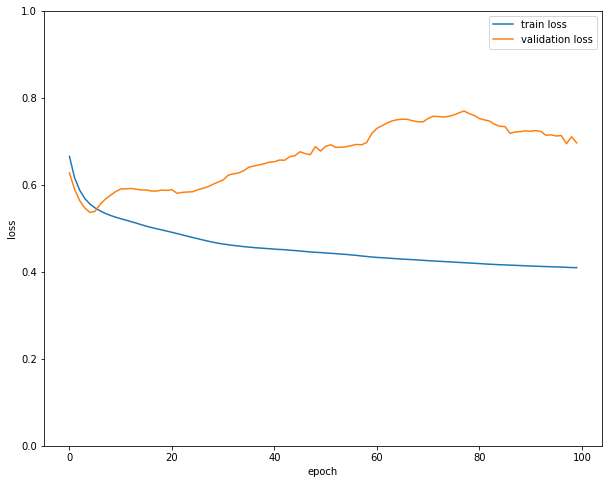

In [ ]:
# define a seed for random number generator so the result will be reproducible
import numpy as np
from tensorflow import random

np.random.seed(seed)
random.set_seed(seed)

# define the keras model
from keras.models import Sequential
from keras.layers import Dense
model_1 = Sequential()
model_1.add(Dense(10, input_dim=X_test.shape[1], activation='relu'))
model_1.add(Dense(6, activation='relu'))
model_1.add(Dense(4, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
# train the model using training set while evaluating on test set
history=model_1.fit(X_train, y_train, batch_size = 20, epochs = 100, validation_data=(X_test, y_test), verbose=0, shuffle=False)

# import require packages for plotting
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline 

# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

# print the best accuracy reached on the test set
print("Best Accuracy on Validation Set =", max(history.history['val_accuracy']))

Best Accuracy on Validation Set = 0.7780441045761108


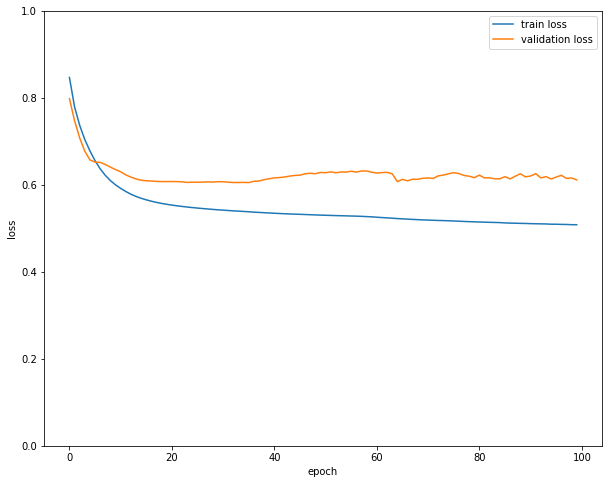

In [ ]:
# set up a seed for random number generator so the result will be reproducible
np.random.seed(seed)
random.set_seed(seed)

# define the keras model with l2 regularization with lambda = 0.01
from keras.regularizers import l2
l2_param = 0.01
model_2 = Sequential()
model_2.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(l2_param)))
model_2.add(Dense(6, activation='relu', kernel_regularizer=l2(l2_param)))
model_2.add(Dense(4, activation='relu', kernel_regularizer=l2(l2_param)))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train the model using training set while evaluationg on test set
history=model_2.fit(X_train, y_train, batch_size = 20, epochs = 100, validation_data=(X_test, y_test), verbose=0, shuffle=False)

# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
# print the best accuracy reached on the test set
print("Best Accuracy on Validation Set =", max(history.history['val_accuracy']))

Best Accuracy on Validation Set = 0.5906040072441101


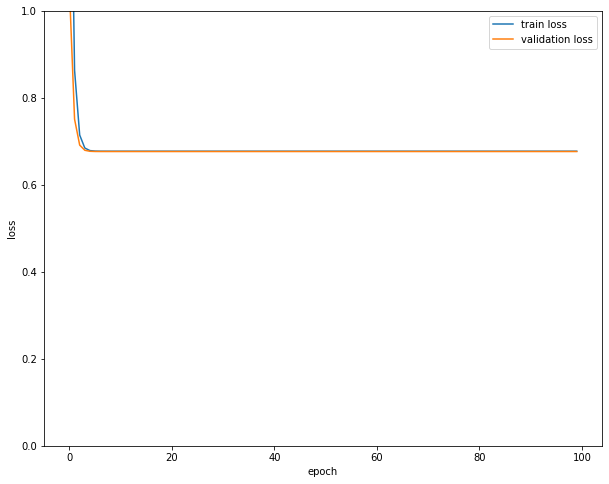

In [ ]:
# set up a seed for random number generator so the result will be reproducible
np.random.seed(seed)
random.set_seed(seed)

# define the keras model with l2 regularization with lambda = 0.1
from keras.regularizers import l2
l2_param = 0.1
model_3 = Sequential()
model_3.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(l2_param)))
model_3.add(Dense(6, activation='relu', kernel_regularizer=l2(l2_param)))
model_3.add(Dense(4, activation='relu', kernel_regularizer=l2(l2_param)))
model_3.add(Dense(1, activation='sigmoid'))
model_3.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train the model using training set while evaluationg on test set
history=model_3.fit(X_train, y_train, batch_size = 20, epochs = 100, validation_data=(X_test, y_test), verbose=0, shuffle=False)

# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
# print the best accuracy reached on the test set
print("Best Accuracy on Validation Set =", max(history.history['val_accuracy']))

Best Accuracy on Validation Set = 0.7986577153205872


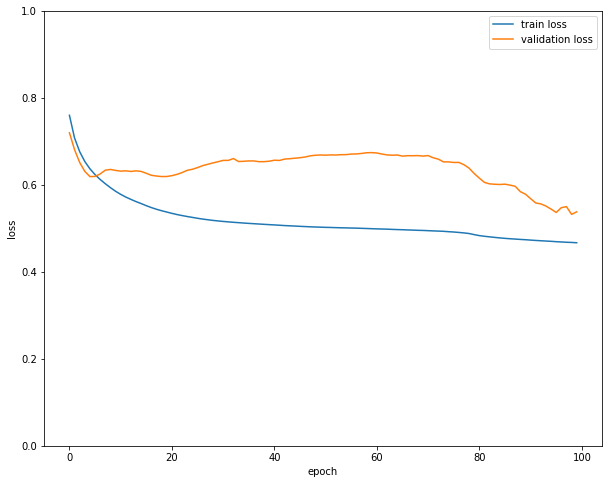

In [ ]:
# set up a seed for random number generator so the result will be reproducible
np.random.seed(seed)
random.set_seed(seed)

# define the keras model with l2 regularization with lambda = 0.05
from keras.regularizers import l2
l2_param = 0.005
model_4 = Sequential()
model_4.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(l2_param)))
model_4.add(Dense(6, activation='relu', kernel_regularizer=l2(l2_param)))
model_4.add(Dense(4, activation='relu', kernel_regularizer=l2(l2_param)))
model_4.add(Dense(1, activation='sigmoid'))
model_4.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train the model using training set while evaluationg on test set
history=model_4.fit(X_train, y_train, batch_size = 20, epochs = 100, validation_data=(X_test, y_test), verbose=0, shuffle=False)

# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
# print the best accuracy reached on the test set
print("Best Accuracy on Validation Set =", max(history.history['val_accuracy']))

Best Accuracy on Validation Set = 0.743048906326294


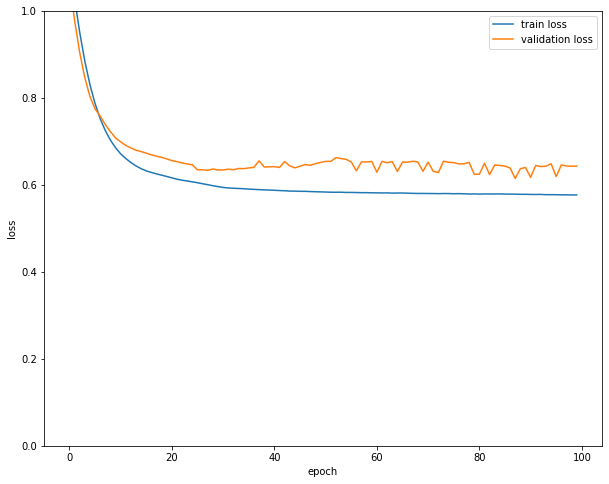

In [ ]:
# set up a seed for random number generator so the result will be reproducible
np.random.seed(seed)
random.set_seed(seed)

# define the keras model with l1 regularization with lambda = 0.01
from keras.regularizers import l1
l1_param = 0.01
model_5 = Sequential()
model_5.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1(l1_param)))
model_5.add(Dense(6, activation='relu', kernel_regularizer=l1(l1_param)))
model_5.add(Dense(4, activation='relu', kernel_regularizer=l1(l1_param)))
model_5.add(Dense(1, activation='sigmoid'))
model_5.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train the model using training set while evaluationg on test set
history=model_5.fit(X_train, y_train, batch_size = 20, epochs = 100, validation_data=(X_test, y_test), verbose=0, shuffle=False)

# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
# print the best accuracy reached on the test set
print("Best Accuracy on Validation Set =", max(history.history['val_accuracy']))

Best Accuracy on Validation Set = 0.784755527973175


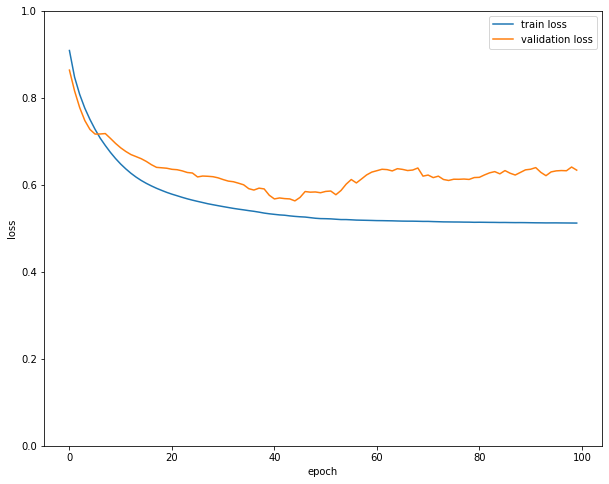

In [ ]:
# set up a seed for random number generator so the result will be reproducible
np.random.seed(seed)
random.set_seed(seed)

# define the keras model with l1 regularization with lambda = 0.1
from keras.regularizers import l1
l1_param = 0.005
model_6 = Sequential()
model_6.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1(l1_param)))
model_6.add(Dense(6, activation='relu', kernel_regularizer=l1(l1_param)))
model_6.add(Dense(4, activation='relu', kernel_regularizer=l1(l1_param)))
model_6.add(Dense(1, activation='sigmoid'))
model_6.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train the model using training set while evaluationg on test set
history=model_6.fit(X_train, y_train, batch_size = 20, epochs = 100, validation_data=(X_test, y_test), verbose=0, shuffle=False)

# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
# print the best accuracy reached on the test set
print("Best Accuracy on Validation Set =", max(history.history['val_accuracy']))

Best Accuracy on Validation Set = 0.7588686347007751


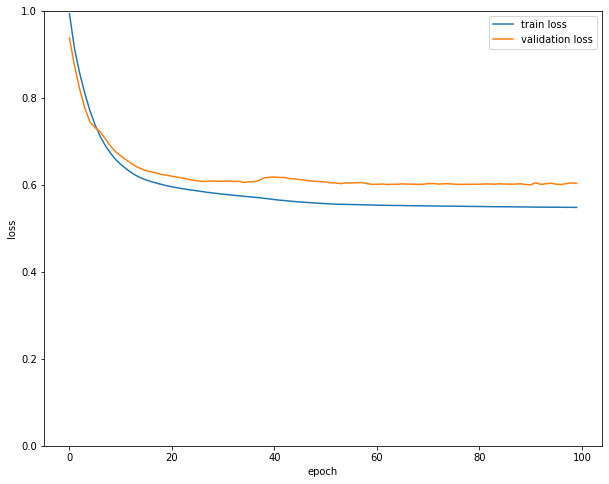

In [ ]:
# set up a seed for random number generator so the result will be reproducible
np.random.seed(seed)
random.set_seed(seed)

# define the keras model with l1_l2 regularization with l1_lambda = 0.005 and l2_lambda = 0.005
from keras.regularizers import l1_l2
l1_param = 0.005
l2_param = 0.005
model_7 = Sequential()
model_7.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1_l2(l1=l1_param, l2=l2_param)))
model_7.add(Dense(6, activation='relu', kernel_regularizer=l1_l2(l1=l1_param, l2=l2_param)))
model_7.add(Dense(4, activation='relu', kernel_regularizer=l1_l2(l1=l1_param, l2=l2_param)))
model_7.add(Dense(1, activation='sigmoid'))
model_7.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train the model using training set while evaluationg on test set
history=model_7.fit(X_train, y_train, batch_size = 20, epochs = 100, validation_data=(X_test, y_test), verbose=0, shuffle=False)
 
# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
# print the best accuracy reached on the test set
print("Best Accuracy on Validation Set =", max(history.history['val_accuracy']))

# Exercise 5.01: Dropout Implementation in Keras

In [ ]:
X = pd.read_csv('drive/data/tree_class_feats.csv')
y = pd.read_csv('drive/data/tree_class_target.csv')

# Split the dataset into training set and test set with a 80-20 ratio
from sklearn.model_selection import train_test_split
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [ ]:
#Define your model 
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from tensorflow import random

np.random.seed(seed)
random.set_seed(seed)

model_1 = Sequential()
model_1.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model_1.add(Dense(12, activation='relu'))
model_1.add(Dense(8, activation='relu'))
model_1.add(Dense(4, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

# Choose the loss function to be binary cross entropy and the optimizer to be SGD for training the model
model_1.compile(optimizer='sgd', loss='binary_crossentropy')
# train the model
model_1.fit(X_train, y_train, epochs=300, batch_size=50, verbose=0, shuffle=False)
# evaluate on test set
print("Test Loss =", model_1.evaluate(X_test, y_test))

63/63 [==============================] - 0s 1ms/step - loss: 0.1796
Test Loss = 0.17957597970962524


In [ ]:
# define the keras model with dropout in the first hidden layer
from keras.layers import Dropout

np.random.seed(seed)
random.set_seed(seed)

model_2 = Sequential()
model_2.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model_2.add(Dropout(0.1))
model_2.add(Dense(12, activation='relu'))
model_2.add(Dense(8, activation='relu'))
model_2.add(Dense(4, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

# Choose the loss function to be binary cross entropy and the optimizer to be SGD for training the model
model_2.compile(optimizer='sgd', loss='binary_crossentropy')
# train the model
model_2.fit(X_train, y_train, epochs=300, batch_size=50, verbose=0, shuffle=False)
# evaluate on test set
print("Test Loss =", model_2.evaluate(X_test, y_test))

63/63 [==============================] - 0s 1ms/step - loss: 0.1790
Test Loss = 0.1790211796760559


In [ ]:
# define the keras model with dropout in all hidden layers
np.random.seed(seed)
random.set_seed(seed)

model_3 = Sequential()
model_3.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model_3.add(Dropout(0.2))
model_3.add(Dense(12, activation='relu'))
model_3.add(Dropout(0.1))
model_3.add(Dense(8, activation='relu'))
model_3.add(Dropout(0.1))
model_3.add(Dense(4, activation='relu'))
model_3.add(Dropout(0.1))
model_3.add(Dense(1, activation='sigmoid'))

# Choose the loss function to be binary cross entropy and the optimizer to be SGD for training the model
model_3.compile(optimizer='sgd', loss='binary_crossentropy')
# train the model
model_3.fit(X_train, y_train, epochs=300, batch_size=50, verbose=0, shuffle=False)
# evaluate on test set
print("Test Loss =", model_3.evaluate(X_test, y_test))

63/63 [==============================] - 0s 1ms/step - loss: 0.2139
Test Loss = 0.21391984820365906



By keeping the dropout regularization of rate=0.2 in the first layer while adding
dropout regularizations of rate=0.1 to the subsequent layers, the test error rate
increased from 16.89% to 19.39%. Like the L1 and L2 regularizations,
adding too much dropout can prevent the model from learning the underlying
function associated with the training data and leads to higher bias than without
dropout regularization.
By keeping the dropout regularization of rate=0.2 in the first layer while adding dropout regularizations of rate=0.1 to the subsequent layers, the test error rate increased from 16.89% to 19.39%. Like the L1 and L2 regularizations, adding too much dropout can prevent the model from learning the underlying function associated with the training data and leads to higher bias than without dropout regularization

# Activity 5.02: Dropout Regularization on the Traffic Volume Dataset

In [ ]:
X = pd.read_csv('drive/data/traffic_volume_feats.csv')
y = pd.read_csv('drive/data/traffic_volume_target.csv')

# Split the dataset into training set and test set with a 80-20 ratio
from sklearn.model_selection import train_test_split
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [ ]:
# define a seed for random number generator so the result will be reproducible
import numpy as np
from tensorflow import random

np.random.seed(seed)
random.set_seed(seed)

from keras.models import Sequential
from keras.layers import Dense
# create model
model_1 = Sequential()
model_1.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(1))
# Compile model
model_1.compile(loss='mean_squared_error', optimizer='rmsprop')
# train the model using training set while evaluating on test set
history=model_1.fit(X_train, y_train, batch_size = 50, epochs = 200, validation_data=(X_test, y_test), verbose=0)

Lowest error on training set =  24.634641647338867
Lowest error on validation set =  25.0037899017334


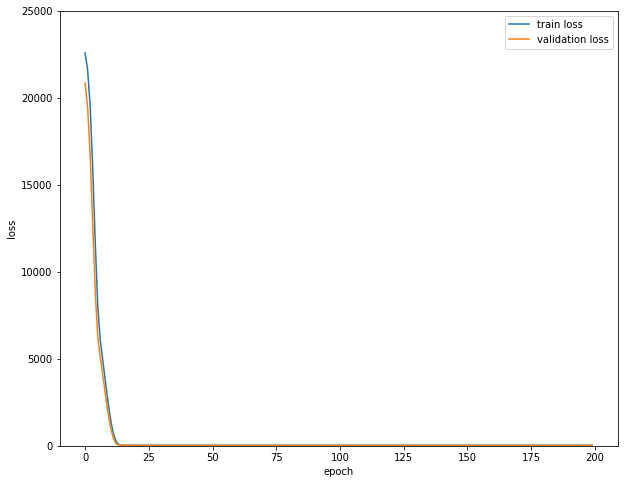

In [ ]:
# import require packages for plotting
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline 

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
# plot training error and test error plots 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# set y axis to be between 0 and 25000, therefore the difference between error rates is more clearly shown
plt.ylim((0, 25000))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

# print the best accuracy reached on the test set
print("Lowest error on training set = ", min(history.history['loss']))
print("Lowest error on validation set = ", min(history.history['val_loss']))

In [ ]:
# define a seed for random number generator so the result will be reproducible
np.random.seed(seed)
random.set_seed(seed)

from keras.layers import Dropout
# create model
model_2 = Sequential()
model_2.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dense(1))
# Compile model
model_2.compile(loss='mean_squared_error', optimizer='rmsprop')
# train the model using training set while evaluating on test set
history=model_2.fit(X_train, y_train, batch_size = 50, epochs = 200, validation_data=(X_test, y_test), verbose=0) 

Lowest error on training set =  408.41162109375
Lowest error on validation set =  49.292686462402344


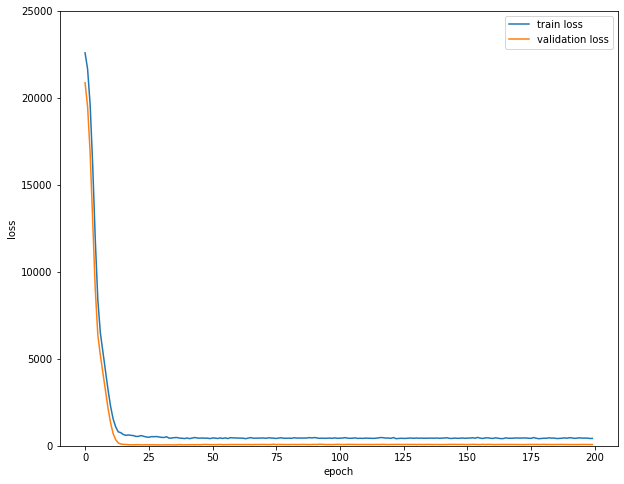

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
# plot training error and test error plots 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim((0, 25000))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

# print the best accuracy reached on the test set
print("Lowest error on training set = ", min(history.history['loss']))
print("Lowest error on validation set = ", min(history.history['val_loss']))

In [ ]:
# define a seed for random number generator so the result will be reproducible
np.random.seed(seed)
random.set_seed(seed)

# create model
model_3 = Sequential()
model_3.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model_3.add(Dropout(0.1))
model_3.add(Dense(10, activation='relu'))
model_3.add(Dropout(0.1))
model_3.add(Dense(1))
# Compile model
model_3.compile(loss='mean_squared_error', optimizer='rmsprop')
# train the model using training set while evaluating on test set
history=model_3.fit(X_train, y_train, batch_size = 50, epochs = 200, validation_data=(X_test, y_test), verbose=0)

Lowest error on training set =  610.7369995117188
Lowest error on validation set =  61.15728759765625


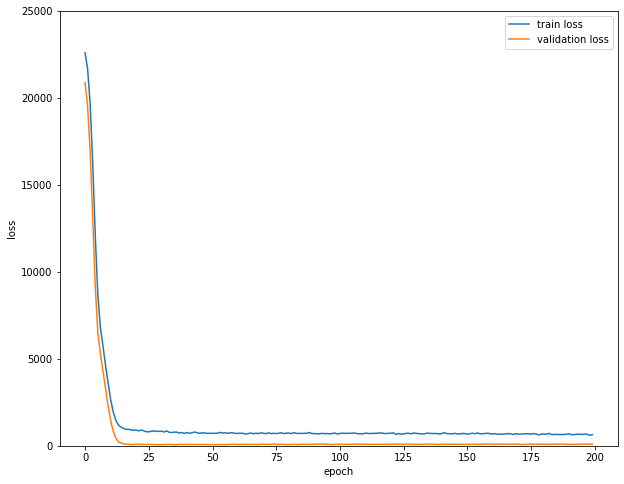

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
# plot training error and test error plots 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim((0, 25000))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

# print the best accuracy reached on the test set
print("Lowest error on training set = ", min(history.history['loss']))
print("Lowest error on validation set = ", min(history.history['val_loss']))

# Exercise 5.02: Implementing Early Stopping in Keras

In [ ]:
X = pd.read_csv('drive/data/tree_class_feats.csv')
y = pd.read_csv('drive/data/tree_class_target.csv')

# Split the dataset into training set and test set with a 80-20 ratio
from sklearn.model_selection import train_test_split
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [ ]:
# Define your model 
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from tensorflow import random

np.random.seed(seed)
random.set_seed(seed)

model_1 = Sequential()
model_1.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model_1.add(Dense(8, activation='relu'))
model_1.add(Dense(4, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

# Choose the loss function to be binary cross entropy and the optimizer to be SGD for training the model
model_1.compile(optimizer='sgd', loss='binary_crossentropy')
# train the model
history = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=50, verbose=0, shuffle=False)

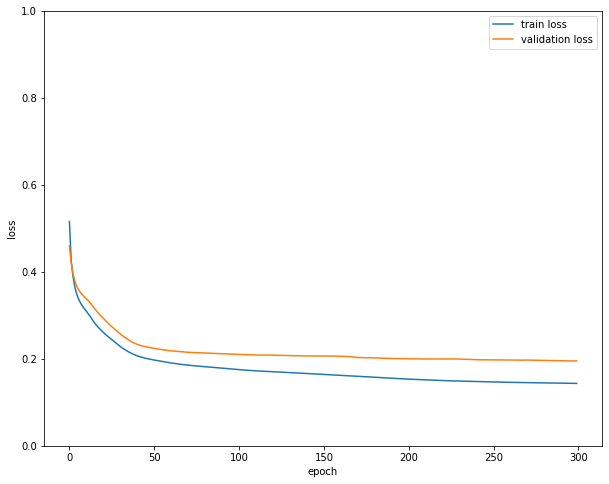

In [ ]:
# import require packages for plotting
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline 

# plot training error and validation error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

In [ ]:
#Define your model with early stopping on test error
from keras.callbacks import EarlyStopping
np.random.seed(seed)
random.set_seed(seed)

model_2 = Sequential()
model_2.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model_2.add(Dense(8, activation='relu'))
model_2.add(Dense(4, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))
# Choose the loss function to be binary cross entropy and the optimizer to be SGD for training the model
model_2.compile(optimizer='sgd', loss='binary_crossentropy')
# define the early stopping callback
es_callback = EarlyStopping(monitor='val_loss', mode='min')
# train the model
history=model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=50, callbacks=[es_callback], verbose=0, shuffle=False)

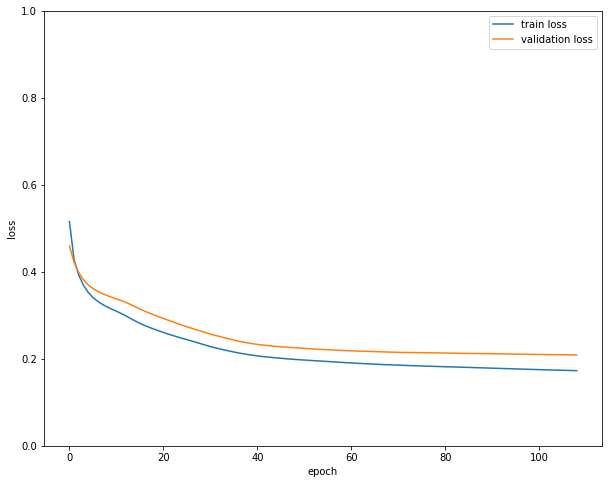

In [ ]:
# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

In [ ]:
#Define your model with early stopping on test error with patience=10
from keras.callbacks import EarlyStopping
np.random.seed(seed)
random.set_seed(seed)

model_3 = Sequential()
model_3.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model_3.add(Dense(8, activation='relu'))
model_3.add(Dense(4, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))
# Choose the loss function to be binary cross entropy and the optimizer to be SGD for training the model
model_3.compile(optimizer='sgd', loss='binary_crossentropy')
# define the early stopping callback
es_callback = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# train the model
history=model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=50, callbacks=[es_callback], verbose=0, shuffle=False)

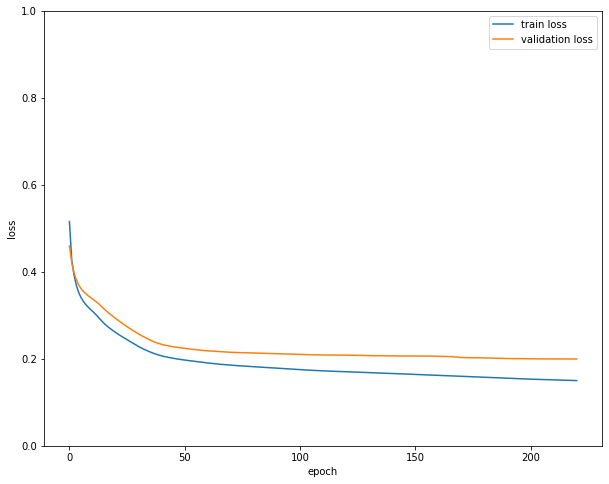

In [ ]:
# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

# Activity 5.03: Hyperparameter Tuning on the Avila Pattern Classifier

In [ ]:
X = pd.read_csv('drive/data/avila-tr_feats.csv')
y = pd.read_csv('drive/data/avila-tr_target.csv')

In [ ]:
# Create the function that returns the keras model
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
def build_model(lambda_parameter):
    model = Sequential()
    model.add(Dense(10, input_dim=X.shape[1], activation='relu', kernel_regularizer=l2(lambda_parameter)))
    model.add(Dense(6, activation='relu', kernel_regularizer=l2(lambda_parameter)))
    model.add(Dense(4, activation='relu', kernel_regularizer=l2(lambda_parameter)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
# define a seed for random number generator so the result will be reproducible
import numpy as np
from tensorflow import random

seed = 1
np.random.seed(seed)
random.set_seed(seed)
# create the Keras wrapper with scikit learn
model = KerasClassifier(build_fn=build_model, verbose=0)
# define all the possible values for each hyperparameter
lambda_parameter = [0.01, 0.5, 1]
epochs = [50, 100]
batch_size = [20]
# create the dictionary containing all possible values of hyperparameters
param_grid = dict(lambda_parameter=lambda_parameter, epochs=epochs, batch_size=batch_size)
# perform 5-fold cross validation for ??????? store the results
grid_seach = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
results_1 = grid_seach.fit(X, y)

# Exercise 6.02: Computing Accuracy and Null Accuracy with APS Failure for Scania Trucks Data

In [ ]:
from tensorflow import random

# Load the Data
X = pd.read_csv("drive/data/aps_failure_training_feats.csv")
y = pd.read_csv("drive/data/aps_failure_training_target.csv")

# use the head function view the first 5 rows of the data
X.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,...,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,...,0.0,0.0,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,...,0.0,2341048.0,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13876.0,38182.0,8138.0,0.0,0.0,65772.0,10534.0,300240.0,48028.0,0.0,0.0,0.0,0.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,642.0,3894.0,10184.0,7554.0,10764.0,1014.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2038.0,...,0.0,2578.0,76.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,0.0,2014.0,370.0,48.0,18.0,15740.0,1822.0,20174.0,44.0,0.0,0.0,0.0,1.08,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,1974038.0,0.0,226.0,0.0,0.0,0.0,3230626.0,2618878.0,1058136.0,551022.0,0.0,0.0,0.0,0.0,1788.0,642.0,0.0,0.0,0.0,0.0,42124.0,372236.0,2128914.0,819596.0,...,0.0,3590004.0,2026.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44946.0,62648.0,11506.0,0.0,0.0,149474.0,35154.0,457040.0,80482.0,98334.0,27588.0,0.0,0.0,21173050.0,1116.06,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
seed = 42
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=seed)

In [ ]:
# Initialize StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Transform the training data
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=X_test.columns)

# Transform the testing data
X_test=sc.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X_train.columns)

In [ ]:
# Import the relevant Keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
# Initiate the model with sequential class
np.random.seed(seed)
random.set_seed(seed)
model=Sequential()

In [ ]:
# Add the hidden dense layers and with dropout Layer
model.add(Dense(units=64, activation='relu', kernel_initializer='uniform', input_dim=X_train.shape[1]))
model.add(Dropout(rate=0.5))
model.add(Dense(units=32, activation='relu', kernel_initializer='uniform', input_dim=X_train.shape[1]))
model.add(Dropout(rate=0.4))
model.add(Dense(units=16, activation='relu', kernel_initializer='uniform', input_dim=X_train.shape[1]))
model.add(Dropout(rate=0.3))
model.add(Dense(units=8, activation='relu', kernel_initializer='uniform', input_dim=X_train.shape[1]))
model.add(Dropout(rate=0.2))
model.add(Dense(units=4, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(rate=0.1))

In [ ]:
# Add Output Dense Layer
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

In [ ]:
# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit the Model
model.fit(X_train, y_train, epochs=100, batch_size=20, verbose=1, validation_split=0.2, shuffle=False)

Epoch 1/100
1920/1920 [==============================] - 5s 3ms/step - loss: 0.1644 - accuracy: 0.9825 - val_loss: 0.0351 - val_accuracy: 0.9842
Epoch 2/100
1920/1920 [==============================] - 5s 2ms/step - loss: 0.0406 - accuracy: 0.9840 - val_loss: 0.0318 - val_accuracy: 0.9842
Epoch 3/100
1920/1920 [==============================] - 5s 2ms/step - loss: 0.0384 - accuracy: 0.9840 - val_loss: 0.0316 - val_accuracy: 0.9842
Epoch 4/100
1920/1920 [==============================] - 5s 2ms/step - loss: 0.0343 - accuracy: 0.9840 - val_loss: 0.0315 - val_accuracy: 0.9842
Epoch 5/100
1920/1920 [==============================] - 5s 3ms/step - loss: 0.0351 - accuracy: 0.9840 - val_loss: 0.0302 - val_accuracy: 0.9842
Epoch 6/100
1920/1920 [==============================] - 5s 3ms/step - loss: 0.0316 - accuracy: 0.9840 - val_loss: 0.0301 - val_accuracy: 0.9842
Epoch 7/100
1920/1920 [==============================] - 5s 3ms/step - loss: 0.0322 - accuracy: 0.9862 - val_loss: 0.0308 - val_ac

In [ ]:
# calculate the null accuracy
y_test['class'].value_counts(normalize=True).loc[0]

0.9823333333333333

Here, we have obtained the null accuracy of the model. As we conclude this
exercise, the following points must be noted: the accuracy of our model is
98.9917%, approximately. Under ideal conditions, 98.9917% accuracy is very
good accuracy, but here, the null accuracy is very high, which helps
put our model's performance into perspective. The null accuracy of our
model is 98.2333%. Since the null accuracy of the model is so high,
an accuracy of 98.9917% is not significant but certainly respectable, and
accuracy in such cases is not the correct metric to evaluate an algorithm with.

# Exercise 6.03: Deriving and Computing Metrics Based on a Confusion Matrix

In [ ]:
# Import the libraries
import numpy as np
import pandas as pd
from tensorflow import random

# Load the Data
X = pd.read_csv("drive/data/aps_failure_training_feats.csv")
y = pd.read_csv("drive/data/aps_failure_training_target.csv")

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
seed = 42
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=seed)

In [ ]:
# Initialize StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Transform the training data
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=X_test.columns)

# Transform the testing data
X_test=sc.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X_train.columns)

In [ ]:
# Import the relevant Keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

np.random.seed(seed)
random.set_seed(seed)
model = Sequential()

# Add the hidden dense layers and with dropout Layer
model.add(Dense(units=64, activation='relu', kernel_initializer='uniform', input_dim=X_train.shape[1]))
model.add(Dropout(rate=0.5))
model.add(Dense(units=32, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=16, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(rate=0.3))
model.add(Dense(units=8, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=4, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(rate=0.1))

# Add Output Dense Layer
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit the Model
model.fit(X_train, y_train, epochs=100, batch_size=20, verbose=1, validation_split=0.2, shuffle=False)

Epoch 1/100
1920/1920 [==============================] - 7s 3ms/step - loss: 0.1644 - accuracy: 0.9825 - val_loss: 0.0351 - val_accuracy: 0.9842
Epoch 2/100
1920/1920 [==============================] - 5s 2ms/step - loss: 0.0406 - accuracy: 0.9840 - val_loss: 0.0318 - val_accuracy: 0.9842
Epoch 3/100
1920/1920 [==============================] - 5s 2ms/step - loss: 0.0381 - accuracy: 0.9840 - val_loss: 0.0303 - val_accuracy: 0.9842
Epoch 4/100
1920/1920 [==============================] - 5s 2ms/step - loss: 0.0342 - accuracy: 0.9840 - val_loss: 0.0313 - val_accuracy: 0.9842
Epoch 5/100
1920/1920 [==============================] - 5s 2ms/step - loss: 0.0360 - accuracy: 0.9840 - val_loss: 0.0301 - val_accuracy: 0.9842
Epoch 6/100
1920/1920 [==============================] - 5s 2ms/step - loss: 0.0324 - accuracy: 0.9840 - val_loss: 0.0302 - val_accuracy: 0.9842
Epoch 7/100
1920/1920 [==============================] - 5s 2ms/step - loss: 0.0321 - accuracy: 0.9860 - val_loss: 0.0294 - val_ac

In [ ]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
# Confusion Matrix & Derived Metrics
from sklearn.metrics import confusion_matrix
y_pred_class1 = y_pred > 0.5
cm = confusion_matrix(y_test, y_pred_class1)
print(cm)

[[11748    40]
 [   82   130]]


In [ ]:
# True Negative
TN = cm[0,0]

# False Negative
FN=cm[1,0]

# False Positives
FP = cm[0,1]

# True Positives
TP = cm[1,1]

In [ ]:
# Calculating Sensitivity
Sensitivity = TP / (TP + FN)
print(f'Sensitivity: {Sensitivity:.4f}')

Sensitivity: 0.6132


In [ ]:
# Calculating Specificity
Specificity = TN / (TN + FP)
print(f'Specificity: {Specificity:.4f}')

Specificity: 0.9966


In [ ]:
# Precision
Precision = TP / (TP + FP)
print(f'Precision: {Precision:.4f}')

Precision: 0.7647


In [ ]:
# Calculate False positive rate
False_Positive_rate = FP / (FP + TN)
print(f'False positive rate: {False_Positive_rate:.4f}')

False positive rate: 0.0034


our model should be more sensitive, but it looks
more specific and less sensitive. So, how do we solve this? The answer lies in
the threshold probabilities. The sensitivity of the model can be increased by
adjusting the threshold value for classifying the dependent variable as 1 or 0.
Recall that, originally, we set the value of y_pred_class1 to greater than 0.5.
Let's change the threshold to 0.3 and rerun the code to check the results.

In [ ]:
y_pred_class2 = y_pred > 0.3

In [ ]:
cm=confusion_matrix(y_test,y_pred_class2)
print(cm)

[[11744    44]
 [   78   134]]


In [ ]:
# True Negative
TN = cm[0,0]

# False Negative
FN=cm[1,0]

# False Positives
FP = cm[0,1]

# True Positives
TP = cm[1,1]

In [ ]:
# Calculating Sensitivity
Sensitivity = TP / (TP + FN)
print(f'Sensitivity: {Sensitivity:.4f}')

Sensitivity: 0.6321


In [ ]:
# Calculating Specificity
Specificity = TN / (TN + FP)
print(f'Specificity: {Specificity:.4f}')

Specificity: 0.9963


So, clearly, decreasing the threshold value increases the sensitivity.
Visualize the data distribution. To understand why decreasing the threshold
value increases the sensitivity, we need to see a histogram of our predicted
probabilities.

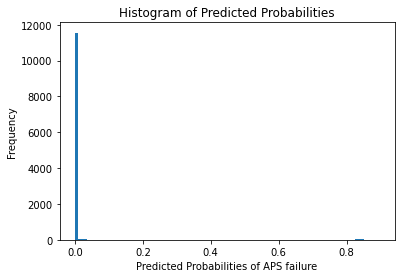

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
#histogram of class distribution
plt.hist(y_pred_prob, bins=100)
plt.title("Histogram of Predicted Probabilities")
plt.xlabel("Predicted Probabilities of APS failure")
plt.ylabel("Frequency")
plt.show()

This histogram clearly shows that most of the probabilities for the predicted
classifier lie in a range from 0.0 to 0.1, which is indeed very low. Unless we
set the threshold very low, we cannot increase the sensitivity of the model.
Also, note that sensitivity is inversely proportional to specificity, so when one
increases, the other decreases.

# Activity 6.02: Calculating the ROC Curve and AUC Score

In [ ]:
# Load the Data
X = pd.read_csv("drive/data/aps_failure_training_feats.csv")
y = pd.read_csv("drive/data/aps_failure_training_target.csv")

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
seed = 42
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=seed)

In [ ]:
# Initialize StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Transform the training data
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=X_test.columns)

# Transform the testing data
X_test=sc.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X_train.columns)

In [ ]:
# Import the relevant Keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

random.set_seed(seed)
np.random.seed(seed)
model = Sequential()

# Add the hidden dense layers and with dropout Layer
model.add(Dense(units=64, activation='relu', kernel_initializer='uniform', input_dim=X_train.shape[1]))
model.add(Dropout(rate=0.5))
model.add(Dense(units=32, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=16, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(rate=0.3))
model.add(Dense(units=8, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=4, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(rate=0.1))

In [ ]:
# Add Output Dense Layer
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit the Model
model.fit(X_train, y_train, epochs=100, batch_size=20, verbose=1, validation_split=0.2, shuffle=False)

Epoch 1/100
1920/1920 [==============================] - 5s 2ms/step - loss: 0.1644 - accuracy: 0.9825 - val_loss: 0.0351 - val_accuracy: 0.9842
Epoch 2/100
1920/1920 [==============================] - 5s 2ms/step - loss: 0.0406 - accuracy: 0.9840 - val_loss: 0.0318 - val_accuracy: 0.9842
Epoch 3/100
1920/1920 [==============================] - 5s 2ms/step - loss: 0.0381 - accuracy: 0.9840 - val_loss: 0.0303 - val_accuracy: 0.9842
Epoch 4/100
1920/1920 [==============================] - 5s 2ms/step - loss: 0.0342 - accuracy: 0.9840 - val_loss: 0.0313 - val_accuracy: 0.9842
Epoch 5/100
1920/1920 [==============================] - 5s 2ms/step - loss: 0.0360 - accuracy: 0.9840 - val_loss: 0.0301 - val_accuracy: 0.9842
Epoch 6/100
1920/1920 [==============================] - 5s 2ms/step - loss: 0.0324 - accuracy: 0.9840 - val_loss: 0.0302 - val_accuracy: 0.9842
Epoch 7/100
1920/1920 [==============================] - 5s 2ms/step - loss: 0.0321 - accuracy: 0.9860 - val_loss: 0.0294 - val_ac

In [ ]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

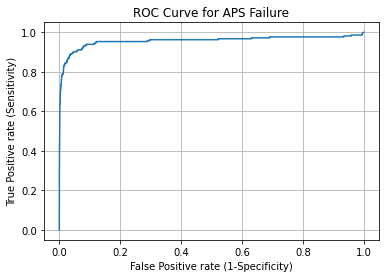

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.title("ROC Curve for APS Failure")
plt.xlabel("False Positive rate (1-Specificity)")
plt.ylabel("True Positive rate (Sensitivity)")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.9571850330684866

# Exercise 7.01: Building a CNN and Identifying Images of Cars and Flowers

In [2]:
!git clone https://github.com/PacktWorkshops/The-Deep-Learning-with-Keras-Workshop.git

Cloning into 'The-Deep-Learning-with-Keras-Workshop'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 22116 (delta 3), reused 0 (delta 0), pack-reused 22107
Receiving objects: 100% (22116/22116), 234.71 MiB | 38.03 MiB/s, done.
Resolving deltas: 100% (522/522), done.
Checking out files: 100% (27211/27211), done.


In [3]:
!ls

sample_data  The-Deep-Learning-with-Keras-Workshop


In [ ]:
# Import the Libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
from tensorflow import random

In [ ]:
#set a seed
seed = 1
np.random.seed(seed)
random.set_seed(seed)

# Initialising the CNN
classifier = Sequential()

In [ ]:
# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPool2D(pool_size = (2, 2)))

#  Flattening
classifier.add(Flatten())

In [ ]:
# Full ANN Connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/The-Deep-Learning-with-Keras-Workshop/Chapter07/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/The-Deep-Learning-with-Keras-Workshop/Chapter07/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 10764 images belonging to 2 classes.
Found 2674 images belonging to 2 classes.


In [ ]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 10000,
                         epochs = 2,
                         validation_data = test_set,
                         validation_steps = 2500,
                         shuffle=False)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
10000/10000 [==============================] - 24s 2ms/step - loss: 0.4933 - accuracy: 0.7696 - val_loss: 0.4655 - val_accuracy: 0.7958


# Activity 7.01: Amending Our Model with Multiple Layers and the Use of softmax

In [ ]:
# Import the Libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
from tensorflow import random

In [ ]:
seed = 1
np.random.seed(seed)
random.set_seed(seed)

# Initialising the CNN
classifier = Sequential()

In [ ]:
#  Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPool2D(pool_size = (2, 2)))

#  Flattening
classifier.add(Flatten())

In [ ]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(units = 1, activation = 'softmax'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/The-Deep-Learning-with-Keras-Workshop/Chapter07/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/The-Deep-Learning-with-Keras-Workshop/Chapter07/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 10764 images belonging to 2 classes.
Found 2674 images belonging to 2 classes.


In [ ]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 10000,
                         epochs = 2,
                         validation_data = test_set,
                         validation_steps = 2500,
                         shuffle=False)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
10000/10000 [==============================] - 26s 2ms/step - loss: 0.4882 - accuracy: 0.4668 - val_loss: 0.4002 - val_accuracy: 0.4693


In this activity, we have modified our CNN model to try and improve the accuracy of
our image classifier. We have added additional convolutional layers and additional
ANN fully connected layers and changed the activation function in the output layer.
By doing so our accuracy has decreased.

# Exercise 8.01: Identifying an Image Using the VGG16 Network

In [ ]:
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [ ]:
classifier = VGG16()

553467904/553467096 [==============================] - 4s 0us/step


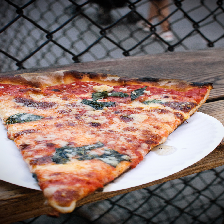

In [ ]:
new_image= image.load_img('/content/The-Deep-Learning-with-Keras-Workshop/Chapter08/Data/Prediction/pizza.jpg', target_size=(224, 224))
new_image

The target size should be 224x224 since VGG16 only accepts (224,224).

In [ ]:
# Change the image to array
transformed_image = image.img_to_array(new_image)
transformed_image.shape

(224, 224, 3)

In [ ]:
# The image has to be in a four-dimensional form for VGG16 to allow further processing
transformed_image = np.expand_dims(transformed_image, axis=0)
transformed_image.shape

(1, 224, 224, 3)

In [ ]:
# Preprocess the image using the preprocess_input function:
transformed_image = preprocess_input(transformed_image)
transformed_image

array([[[[ -65.939   ,  -83.779   ,  -91.68    ],
         [ -72.939   ,  -89.779   ,  -97.68    ],
         [ -73.939   ,  -88.779   ,  -95.68    ],
         ...,
         [-101.939   , -114.779   , -121.68    ],
         [ -89.939   , -103.779   , -108.68    ],
         [ -66.939   ,  -81.779   ,  -88.68    ]],

        [[ -66.939   ,  -83.779   ,  -91.68    ],
         [ -71.939   ,  -89.779   ,  -95.68    ],
         [ -66.939   ,  -81.779   ,  -89.68    ],
         ...,
         [ -98.939   , -113.779   , -121.68    ],
         [ -72.939   ,  -88.779   , -100.68    ],
         [ -49.939003,  -67.779   ,  -75.68    ]],

        [[ -65.939   ,  -82.779   ,  -90.68    ],
         [ -66.939   ,  -83.779   ,  -91.68    ],
         [ -59.939003,  -77.779   ,  -83.68    ],
         ...,
         [-101.939   , -114.779   , -121.68    ],
         [ -80.939   ,  -93.779   , -106.68    ],
         [ -53.939003,  -71.779   ,  -79.68    ]],

        ...,

        [[ -94.939   ,  -98.779   ,  -

In [ ]:
# Create the predictor variable:
y_pred = classifier.predict(transformed_image)
y_pred

array([[8.85207569e-08, 1.87728767e-06, 1.08523089e-07, 1.54110875e-08,
        6.45585999e-07, 1.24716303e-06, 4.30694485e-07, 1.34532684e-06,
        3.88406579e-06, 1.79816482e-08, 6.62177229e-08, 1.22414747e-07,
        1.53969359e-05, 2.62048076e-07, 7.45991358e-08, 1.00193198e-07,
        1.80265314e-08, 2.60932126e-07, 1.80379075e-07, 5.88957448e-07,
        2.03587440e-08, 2.46095677e-08, 1.02709716e-08, 2.72067133e-08,
        3.79421081e-08, 4.92240160e-09, 2.62525717e-08, 7.65928405e-08,
        1.05241726e-08, 3.50513112e-08, 2.17934719e-08, 3.83022503e-08,
        2.34992825e-08, 1.43329805e-06, 2.31770628e-07, 6.41877307e-09,
        7.62337251e-08, 1.58756734e-07, 1.70509310e-07, 1.98357768e-07,
        6.90875979e-08, 1.79643695e-08, 1.31652439e-06, 1.75151655e-07,
        9.60863531e-08, 9.44049035e-08, 3.29603971e-08, 1.52258863e-07,
        2.05898889e-08, 3.49598253e-07, 3.18543641e-07, 2.88115896e-08,
        8.90256757e-08, 4.50872832e-08, 1.70300012e-07, 2.950100

Check the shape of the image. It should be (1,1000). It's 1000 because the
ImageNet database has 1000 categories of images. The predictor variable
shows the probability of our image being one of those images:

In [ ]:
# Check the shape of the array
y_pred.shape

(1, 1000)

Print the top five probabilities of what our image is using the decode_
predictions function and pass the function of the predictor variable, y_
pred, and the number of predictions and corresponding labels to output:

In [ ]:
# Make the prediction
from keras.applications.vgg16 import decode_predictions
decode_predictions(y_pred, top=5)

40960/35363 [==================================] - 0s 0us/step


[[('n07873807', 'pizza', 0.9768049),
  ('n07871810', 'meat_loaf', 0.012848774),
  ('n07880968', 'burrito', 0.0019429056),
  ('n04270147', 'spatula', 0.0019108455),
  ('n03887697', 'paper_towel', 0.0009799768)]]

The first column of the array is the internal code number. The second is the
possible label, while the third is the probability of the image being the label.

Put the predictions in a human-readable form. Print the most probable label
from the output from the result of the decode_predictions function

In [ ]:
# Make the prediction is redeable form
label = decode_predictions(y_pred)
# retrieve the most likely result, e.g. highest probability
decoded_label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (decoded_label[1], decoded_label[2]*100 ))

pizza (97.68%)


# Activity 8.01: Using the VGG16 Network to Train a Deep Learning Network to Identify Images

In [ ]:
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [ ]:
classifier = VGG16()
classifier.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

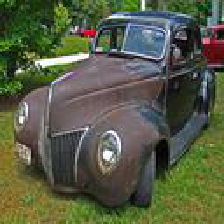

In [ ]:
new_image = image.load_img('/content/The-Deep-Learning-with-Keras-Workshop/Chapter07/test_image_1.jpg', target_size=(224, 224))
new_image

In [ ]:
transformed_image = image.img_to_array(new_image)
transformed_image.shape

(224, 224, 3)

In [ ]:
transformed_image = np.expand_dims(transformed_image, axis=0)
transformed_image.shape

(1, 224, 224, 3)

In [ ]:
transformed_image = preprocess_input(transformed_image)
transformed_image


array([[[[-48.939003 ,   6.2210007, -47.68     ],
         [-48.939003 ,   6.2210007, -47.68     ],
         [-35.939003 ,  18.221    , -33.68     ],
         ...,
         [-50.939003 , -46.779    , -64.68     ],
         [-27.939003 , -21.779    , -37.68     ],
         [-27.939003 , -21.779    , -37.68     ]],

        [[-48.939003 ,   6.2210007, -47.68     ],
         [-48.939003 ,   6.2210007, -47.68     ],
         [-35.939003 ,  18.221    , -33.68     ],
         ...,
         [-50.939003 , -46.779    , -64.68     ],
         [-27.939003 , -21.779    , -37.68     ],
         [-27.939003 , -21.779    , -37.68     ]],

        [[-75.939    , -25.779    , -76.68     ],
         [-75.939    , -25.779    , -76.68     ],
         [-93.939    , -43.779    , -92.68     ],
         ...,
         [-56.939003 , -50.779    , -74.68     ],
         [ -9.939003 ,  -1.7789993, -23.68     ],
         [ -9.939003 ,  -1.7789993, -23.68     ]],

        ...,

        [[-62.939003 ,   5.2210007,  -

In [ ]:
y_pred = classifier.predict(transformed_image)
y_pred

array([[3.00090477e-08, 4.30696634e-09, 4.37408438e-08, 1.37138514e-08,
        3.94195219e-08, 2.69199543e-08, 8.03866484e-09, 2.48148353e-07,
        2.06229217e-07, 8.41082155e-08, 7.25856131e-09, 1.52557522e-08,
        3.07362811e-08, 5.65123770e-09, 6.57817090e-09, 3.05476213e-08,
        7.99061883e-09, 6.33180308e-09, 6.25991277e-08, 7.32099092e-09,
        9.90469573e-09, 2.23144880e-08, 4.13164294e-08, 1.36570668e-06,
        5.57392923e-08, 3.70358784e-08, 9.15631038e-09, 6.64145894e-09,
        5.87615601e-09, 9.26512644e-09, 1.05900462e-07, 5.08535294e-08,
        7.09703727e-08, 1.02023359e-08, 3.39899842e-08, 3.61603512e-08,
        2.54104631e-08, 4.33998686e-08, 1.17528556e-08, 8.59531024e-09,
        2.37356694e-08, 6.39875841e-09, 3.48189899e-09, 7.08637460e-09,
        1.58595981e-08, 9.75368586e-09, 3.20685736e-08, 3.87304189e-09,
        5.61690676e-08, 4.90268404e-09, 4.69177452e-09, 1.52456082e-07,
        2.06022488e-08, 1.24599353e-08, 1.18785408e-08, 2.640572

In [ ]:
y_pred.shape

(1, 1000)

In [ ]:
from keras.applications.vgg16 import decode_predictions
decode_predictions(y_pred, top=5)

[[('n03930630', 'pickup', 0.8184686),
  ('n04461696', 'tow_truck', 0.11525632),
  ('n02974003', 'car_wheel', 0.013617662),
  ('n03459775', 'grille', 0.009970136),
  ('n03100240', 'convertible', 0.009293863)]]

In [ ]:
label = decode_predictions(y_pred)
# retrieve the most likely result, i.e. highest probability
decoded_label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (decoded_label[1], decoded_label[2]*100 ))

pickup (81.85%)


# Exercise 8.02: Classifying Images That Are Not Present in the ImageNet Database

In [ ]:
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [ ]:
classifier = VGG16()
classifier.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

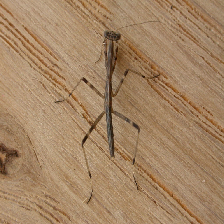

In [ ]:
new_image = image.load_img('/content/The-Deep-Learning-with-Keras-Workshop/Chapter08/Data/Prediction/stick_insect.jpg', target_size=(224, 224))
new_image

In [ ]:
transformed_image = image.img_to_array(new_image)
transformed_image.shape

(224, 224, 3)

In [ ]:
transformed_image = np.expand_dims(transformed_image, axis=0)
transformed_image.shape

(1, 224, 224, 3)

In [ ]:
transformed_image = preprocess_input(transformed_image)
transformed_image

array([[[[-7.9390030e+00,  1.6221001e+01,  4.3320000e+01],
         [ 2.0609970e+00,  2.4221001e+01,  5.1320000e+01],
         [ 1.6060997e+01,  3.2221001e+01,  5.6320000e+01],
         ...,
         [ 7.0609970e+00,  2.1221001e+01,  4.0320000e+01],
         [-1.9390030e+00,  1.6221001e+01,  3.4320000e+01],
         [-6.9390030e+00,  1.4221001e+01,  3.1320000e+01]],

        [[ 9.0609970e+00,  3.3221001e+01,  6.0320000e+01],
         [ 6.0997009e-02,  2.2221001e+01,  4.9320000e+01],
         [ 8.0609970e+00,  3.1221001e+01,  5.4320000e+01],
         ...,
         [-6.9390030e+00,  1.1221001e+01,  2.9320000e+01],
         [-2.9390030e+00,  1.4221001e+01,  3.2320000e+01],
         [ 6.0609970e+00,  2.0221001e+01,  3.9320000e+01]],

        [[ 1.0060997e+01,  3.7221001e+01,  6.5320000e+01],
         [ 9.0609970e+00,  2.8221001e+01,  5.7320000e+01],
         [-9.3900299e-01,  1.8221001e+01,  4.6320000e+01],
         ...,
         [-6.9390030e+00,  9.2210007e+00,  2.9320000e+01],
         [

In [ ]:
y_pred = classifier.predict(transformed_image)
y_pred

array([[4.21830777e-07, 1.85480451e-06, 1.72294403e-06, 6.76565776e-07,
        2.89054024e-05, 1.41853370e-05, 1.71890588e-05, 2.24749851e-06,
        3.92589845e-06, 3.78674326e-06, 2.06268523e-05, 7.51030439e-06,
        1.40643606e-05, 3.43733518e-05, 1.98463003e-05, 8.18992612e-06,
        1.08288214e-05, 1.76718095e-05, 1.64576632e-05, 3.33322569e-05,
        2.74088761e-05, 3.04659534e-06, 5.54779444e-06, 4.73525733e-06,
        3.29871023e-06, 1.77044101e-04, 1.83029581e-04, 5.83823363e-04,
        5.24100265e-04, 1.54459769e-06, 5.06805118e-05, 1.18027761e-04,
        2.67617870e-04, 1.81688793e-05, 3.93874870e-05, 4.16620642e-05,
        1.94424774e-05, 3.64137486e-05, 4.32395696e-04, 1.50895603e-05,
        6.48877001e-04, 8.92810698e-04, 4.67033271e-04, 1.95193916e-05,
        1.00129703e-03, 1.36421600e-04, 4.56672598e-04, 4.72387546e-05,
        5.16185037e-06, 2.23004154e-05, 1.38762007e-05, 3.23493191e-06,
        3.17189581e-04, 1.60120326e-04, 1.34436457e-04, 1.187296

In [ ]:
y_pred.shape

(1, 1000)

In [ ]:
from keras.applications.vgg16 import decode_predictions
decode_predictions(y_pred, top=5)

[[('n02231487', 'walking_stick', 0.30524546),
  ('n01775062', 'wolf_spider', 0.26035652),
  ('n03804744', 'nail', 0.1432314),
  ('n01770081', 'harvestman', 0.06665219),
  ('n01773549', 'barn_spider', 0.036703132)]]

In [ ]:
label = decode_predictions(y_pred)
# retrieve the most likely result, i.e. highest probability
decoded_label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (decoded_label[1], decoded_label[2]*100 ))

walking_stick (30.52%)


Clearly, the image is not a walking stick but a stick insect;
out of all the labels that the VGG16 network contains, a walking stick is the
closest thing to a stick insect

To avoid such outputs, we could freeze the existing layer of VGG16 and add our
own layer. We could also add a layer that contains images of walking sticks and stick
insects so that we can obtain better output.

# Exercise 8.03: Fine-Tuning the VGG16 Model

Let's work on fine-tuning the VGG16 model. In this exercise, we will freeze the
network and remove the last layer of VGG16, which has 1000 labels in it. After
removing the last layer, we will build a new flower-car classifier ANN, just like we did
in Chapter 7, Computer Vision with Convolutional Neural Networks, and will connect this
ANN to VGG16 instead of the original one with 1000 labels. Essentially, what we will
do is replace the last layer of VGG16 with a user-defined layer

In [1]:
import numpy as np
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow import random

In [4]:
vgg_model = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 3s 0us/step


In [5]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Remove the last layer, labeled predictions in the preceding image,
from the model summary. Create a new Keras model of the sequential class
and iterate through all the layers of the VGG model. Add all of them to the new
model, except for the last layer

In [6]:
last_layer = str(vgg_model.layers[-1])

np.random.seed(42)
random.set_seed(42)
classifier= Sequential()
for layer in vgg_model.layers:
    if str(layer) != last_layer:
        classifier.add(layer)

Here, we have created a new model name's classifier instead of vgg_model. All
the layers, except the last layer, that is, vgg_model, have been included in
the classifier.

In [7]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

Freeze the layers by iterating through the layers and setting the trainable
parameter to False

In [8]:
for layer in classifier.layers:
    layer.trainable=False

Add a new output layer of size 1 with a sigmoid activation function and print
the model summary

In [9]:
classifier.add(Dense(1, activation='sigmoid'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [11]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Create some training and test data generators, just like we did in Chapter 7,
Computer Vision with Convolutional Neural Networks. Rescale the training and test
images by 1/255 so that all the values are between 0 and 1. Set the following
parameters for the training data generators only: shear_range=0.2, zoom_
range=0.2, and horizontal_flip=True.

In [12]:
from keras.preprocessing.image import ImageDataGenerator

generate_train_data = ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

generate_test_data = ImageDataGenerator(rescale =1./255)

Next, create a training set from the training set folder. ../Data/
dataset/training_set is the folder where our data is placed. Our CNN
model has an image size of 224x224, so the same size should be passed
here too. batch_size is the number of images in a single batch, which is 32.
class_mode is binary since we are creating a binary classifier.

In [13]:
training_dataset = generate_train_data.flow_from_directory('/content/The-Deep-Learning-with-Keras-Workshop/Chapter08/Data/Dataset/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_datasetset = generate_test_data.flow_from_directory('/content/The-Deep-Learning-with-Keras-Workshop/Chapter08/Data/Dataset/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 10764 images belonging to 2 classes.
Found 2674 images belonging to 2 classes.


In [14]:
classifier.fit_generator(training_dataset,
                         steps_per_epoch = 100,
                         epochs = 10,
                         validation_data = test_datasetset,
                         validation_steps = 30,
                         shuffle=False)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 42s 354ms/step - loss: 0.7056 - accuracy: 0.4778 - val_loss: 0.7067 - val_accuracy: 0.4812
Epoch 2/10
100/100 [==============================] - 36s 357ms/step - loss: 0.7083 - accuracy: 0.4688 - val_loss: 0.7103 - val_accuracy: 0.4781
Epoch 3/10
100/100 [==============================] - 36s 358ms/step - loss: 0.6975 - accuracy: 0.4976 - val_loss: 0.7136 - val_accuracy: 0.4740
Epoch 4/10
100/100 [==============================] - 36s 358ms/step - loss: 0.7026 - accuracy: 0.4806 - val_loss: 0.7149 - val_accuracy: 0.4594
Epoch 5/10
100/100 [==============================] - 36s 357ms/step - loss: 0.7087 - accuracy: 0.4707 - val_loss: 0.7134 - val_accuracy: 0.4729
Epoch 6/10
100/100 [==============================] - 36s 358ms/step - loss: 0.7073 - accuracy: 0.4768 - val_loss: 0.7067 - val_accuracy: 0.4865
Epoch 7/10
100/100 [==============================] - 36s 357ms/step - loss: 0.7066 - accuracy: 0.4791 - val_loss: 0.7057 - val_ac

There are 100 training images here, so set steps_per_epoch =100, set
validation_steps=30, and set shuffle=False:

Predict the new image (the code is the same as it was in Chapter 7, Computer
Vision with Convolutional Neural Networks). First, load the image from '../Data/
Prediction/test_image_2.jpg' and set the target size to (224, 224)
since the VGG16 model accepts images of that size.

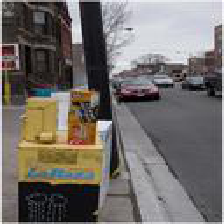

In [15]:
import numpy as np
from keras.preprocessing import image
new_image = image.load_img('/content/The-Deep-Learning-with-Keras-Workshop/Chapter08/Data/Dataset/test_set/car/fcea2e889e0b8522.jpg', target_size = (224, 224))
new_image

In [16]:
training_dataset.class_indices

{'car': 0, 'flower': 1}

Predict the new image (the code is the same as it was in Chapter 7, Computer
Vision with Convolutional Neural Networks). First, load the image from '../Data/
Prediction/test_image_2.jpg' and set the target size to (224, 224)
since the VGG16 model accepts images of that size.

In [17]:
new_image = image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis = 0)
result = classifier.predict(new_image)

if result[0][0] == 1:
    prediction = 'It is a flower'
else:
    prediction = 'It is a car'

print(prediction)

It is a car


Next, preprocess the image, first by converting the image into an array using the
img_to_array function, then by adding another dimension along the 0th
axis using the expand_dims function. Finally, make the prediction using
the predict method of the classifier and printing the output in
human-readable format:

As a final step, you can save the classifier by running classifier.
save('car-flower-classifier.h5')

In [18]:
classifier.save('car-flower-classifier.h5')

# Exercise 8.04: Image Classification with ResNet

In [19]:
import numpy as np
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image

In [20]:
classifier = ResNet50()
classifier.summary()

102973440/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

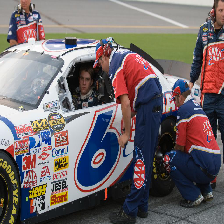

In [21]:
new_image = image.load_img('/content/The-Deep-Learning-with-Keras-Workshop/Chapter08/Data/Prediction/test_image_3.jpg', target_size=(224, 224))
new_image

In [22]:
transformed_image = image.img_to_array(new_image)
transformed_image.shape

(224, 224, 3)

In [23]:
transformed_image = np.expand_dims(transformed_image, axis=0)
transformed_image.shape

(1, 224, 224, 3)

In [24]:
transformed_image = preprocess_input(transformed_image)
transformed_image

array([[[[ 4.2060997e+01,  3.1221001e+01,  2.5320000e+01],
         [ 4.3060997e+01,  3.2221001e+01,  2.6320000e+01],
         [ 4.3060997e+01,  3.2221001e+01,  2.6320000e+01],
         ...,
         [-4.5939003e+01, -5.3778999e+01, -2.7680000e+01],
         [-4.1939003e+01, -5.3778999e+01, -3.9680000e+01],
         [-5.1939003e+01, -6.5778999e+01, -5.6680000e+01]],

        [[ 4.3060997e+01,  3.2221001e+01,  2.6320000e+01],
         [ 4.4060997e+01,  3.3221001e+01,  2.7320000e+01],
         [ 4.5060997e+01,  3.4221001e+01,  2.8320000e+01],
         ...,
         [-3.9390030e+00, -6.7789993e+00,  2.6320000e+01],
         [-3.4939003e+01, -3.9778999e+01, -1.6680000e+01],
         [-3.9939003e+01, -4.8778999e+01, -2.7680000e+01]],

        [[ 4.3060997e+01,  3.2221001e+01,  2.6320000e+01],
         [ 4.5060997e+01,  3.4221001e+01,  2.8320000e+01],
         [ 4.4060997e+01,  3.3221001e+01,  2.7320000e+01],
         ...,
         [ 2.8060997e+01,  3.0221001e+01,  7.2320000e+01],
         [

In [25]:
y_pred = classifier.predict(transformed_image)
y_pred

array([[5.30550608e-08, 1.70555730e-08, 5.05207890e-06, 5.50512596e-07,
        6.93180141e-07, 6.54612933e-08, 1.64319545e-07, 4.81541349e-07,
        4.22965236e-08, 1.73899153e-07, 1.95568006e-09, 3.38567241e-09,
        1.56229085e-09, 1.74051951e-09, 1.24102328e-09, 5.68546410e-09,
        2.72574834e-08, 1.05641462e-07, 3.63425272e-08, 9.50203916e-09,
        1.31702194e-09, 1.72830674e-08, 1.18603843e-07, 3.19640458e-06,
        5.30170254e-08, 1.24895276e-08, 1.22984933e-09, 8.59748539e-09,
        8.02479683e-09, 3.07985726e-09, 1.05095568e-08, 8.66570993e-09,
        2.62512767e-09, 2.13930502e-06, 2.07383673e-05, 2.62516906e-08,
        3.12488915e-08, 1.16447847e-08, 4.51892301e-09, 2.99051976e-07,
        4.16445678e-09, 2.47749288e-09, 3.04586962e-07, 4.07723855e-09,
        2.38804709e-08, 1.02666959e-07, 3.24746030e-09, 5.07991915e-09,
        3.66692952e-08, 7.58475593e-08, 2.17913687e-08, 2.62559479e-06,
        2.09005606e-07, 2.48877257e-07, 3.48928531e-08, 1.105968

In [26]:
y_pred.shape

(1, 1000)

In [27]:
from keras.applications.resnet50 import decode_predictions
decode_predictions(y_pred, top=5)

40960/35363 [==================================] - 0s 0us/step


[[('n04037443', 'racer', 0.82766914),
  ('n04285008', 'sports_car', 0.052046265),
  ('n02974003', 'car_wheel', 0.02351011),
  ('n02504013', 'Indian_elephant', 0.019609347),
  ('n04461696', 'tow_truck', 0.0067269523)]]

In [28]:
label = decode_predictions(y_pred)
# retrieve the most likely result, i.e. highest probability
decoded_label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (decoded_label[1], decoded_label[2]*100 ))

racer (82.77%)


# Exercise 9.01: Predicting the Trend of Alphabet's Stock Price Using an LSTM with 50 Units (Neurons)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import random


In [37]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
dataset_training = pd.read_csv('/content/drive/MyDrive/data/GOOG_train.csv')
dataset_training.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,555.647278,556.788025,552.060730,554.481689,554.481689,3656400
1,2014-01-03,555.418152,556.379578,550.401978,550.436829,550.436829,3345800
2,2014-01-06,554.426880,557.340942,551.154114,556.573853,556.573853,3551800
3,2014-01-07,560.399475,567.717041,558.486633,567.303589,567.303589,5124300
4,2014-01-08,570.860291,571.517822,564.528992,568.484192,568.484192,4501700


We are going to make our prediction using the Open stock price; therefore,
select the Open stock price column from the dataset and print the values

In [40]:
training_data = dataset_training[['Open']].values
training_data

array([[ 555.647278],
       [ 555.418152],
       [ 554.42688 ],
       ...,
       [1017.150024],
       [1049.619995],
       [1050.959961]])

Then, perform feature scaling by normalizing the data using MinMaxScaler
and setting the range of the features so that they have a minimum value of 0
and a maximum value of one. Use the fit_transform method of the scaler
on the training data:

In [41]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_data_scaled = sc.fit_transform(training_data)

training_data_scaled

array([[0.08017394],
       [0.07987932],
       [0.07860471],
       ...,
       [0.67359064],
       [0.71534169],
       [0.71706467]])

Create the data to get 60 timestamps from the current instance. We chose 60
here as this will give us a sufficient number of previous instances so that we can
understand the trend; technically, this can be any number, but 60 is the optimal
value. Additionally, the upper bound value here is 1258, which is the index or
count of rows (or records) in the training set

In [42]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_data_scaled[i-60:i, 0])
    y_train.append(training_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

Next, reshape the data to add an extra dimension to the end of X_train using
NumPy's reshape function

In [43]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08017394],
        [0.07987932],
        [0.07860471],
        ...,
        [0.10999004],
        [0.09405781],
        [0.08533808]],

       [[0.07987932],
        [0.07860471],
        [0.08628449],
        ...,
        [0.09405781],
        [0.08533808],
        [0.09263448]],

       [[0.07860471],
        [0.08628449],
        [0.09973538],
        ...,
        [0.08533808],
        [0.09263448],
        [0.08214508]],

       ...,

       [[0.90856424],
        [0.89708166],
        [0.91513484],
        ...,
        [0.6712118 ],
        [0.61797825],
        [0.63740721]],

       [[0.89708166],
        [0.91513484],
        [0.90270076],
        ...,
        [0.61797825],
        [0.63740721],
        [0.67359064]],

       [[0.91513484],
        [0.90270076],
        [0.86691601],
        ...,
        [0.63740721],
        [0.67359064],
        [0.71534169]]])

In [44]:
# Import the following Keras libraries to build the RNN:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [45]:
# Set the seed and initiate the sequential model, as follows:
seed = 1
np.random.seed(seed)
random.set_seed(seed)
# initialize model
model = Sequential()

Add an LSTM layer to the network with 50 units, set the return_sequences
argument to True, and set the input_shape argument to (X_train.
shape[1], 1). Add three additional LSTM layers, each with 50 units, and set
the return_sequences argument to True for the first two, as follows

In [46]:
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

# Adding a second LSTM layer
model.add(LSTM(units = 50, return_sequences = True))

# Adding a third LSTM layer
model.add(LSTM(units = 50, return_sequences = True))

# Adding a fourth LSTM layer
model.add(LSTM(units = 50))

# Adding the output layer
model.add(Dense(units = 1))

In [47]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 5s 14ms/step - loss: 0.0736
Epoch 2/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0029
Epoch 3/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0023
Epoch 4/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0029
Epoch 5/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0021
Epoch 6/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0021
Epoch 7/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0020
Epoch 8/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0019
Epoch 9/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0021
Epoch 10/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0022
Epoch 11/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0019
Epoch 12/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0020
Epoch 13/100
38/38 [=====

Load and process the test data (which is treated as actual data here) and select
the column representing the value of Open stock data:

In [48]:
dataset_testing = pd.read_csv("/content/drive/MyDrive/data/GOOG_test.csv")
actual_stock_price = dataset_testing[['Open']].values
actual_stock_price

array([[1016.570007],
       [1041.      ],
       [1032.589966],
       [1071.5     ],
       [1076.109985],
       [1081.650024],
       [1067.660034],
       [1063.180054],
       [1046.920044],
       [1050.170044],
       [1080.      ],
       [1079.469971],
       [1100.      ],
       [1088.      ],
       [1077.349976],
       [1076.47998 ],
       [1085.      ],
       [1080.109985],
       [1072.680054],
       [1068.430054],
       [1103.      ]])

Concatenate the data; we will need 60 previous instances in order to get the
stock price for each day. Therefore, we will need both training and test data:

In [49]:
total_data = pd.concat((dataset_training['Open'], dataset_testing['Open']), axis = 0)
inputs = total_data[len(total_data) - len(dataset_testing) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 81):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Reshape and scale the input to prepare the test data. Note that we are predicting
the January monthly trend, which has 21 financial days, so in order to prepare
the test set, we take the lower bound value as 60 and the upper bound value as
81. This ensures that the difference of 21 is maintained

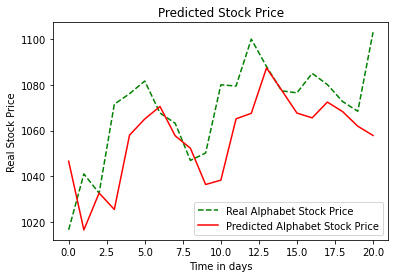

In [50]:
# Visualising the results
plt.plot(actual_stock_price, color = 'green', label = 'Real Alphabet Stock Price',ls='--')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Alphabet Stock Price',ls='-')
plt.title('Predicted Stock Price')
plt.xlabel('Time in days')
plt.ylabel('Real Stock Price')
plt.legend()
plt.show()

# Activity 9.01: Predicting the Trend of Amazon's Stock Price Using an LSTM with 50 Units (Neurons)